<h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown; text-align: center;">Auto Scout EDA Project Part 3</h2>

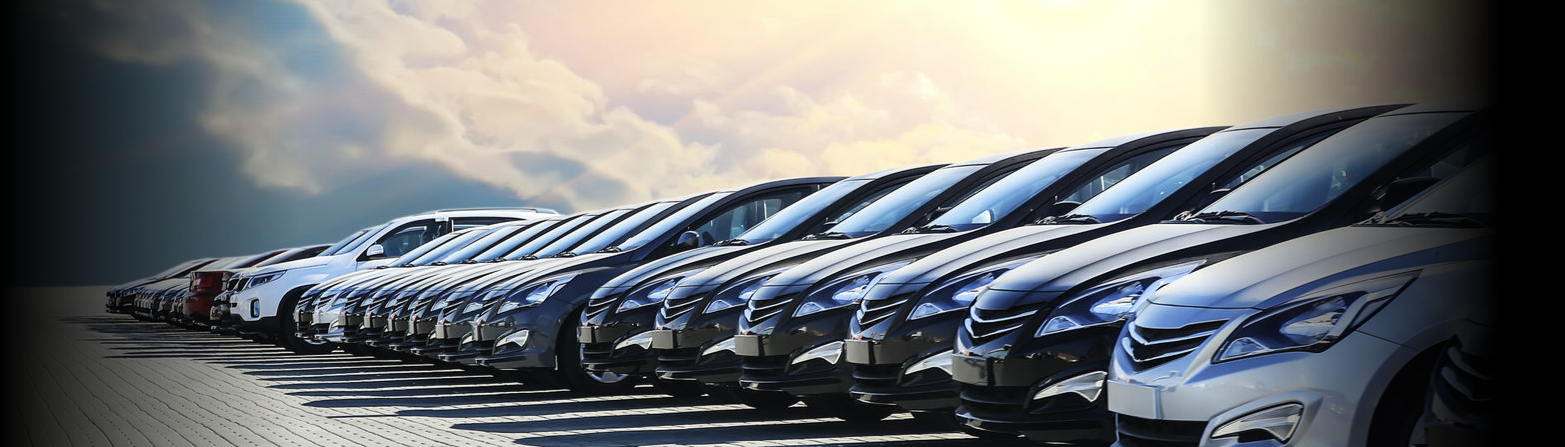

<div style="background-color: #E6F2FF; padding: 10px;">
<h2 style="border: 0; border-radius: 15px; font-weight: bold; font-size: 220%; color: brown"><center> Content </center></h2>  


- [OUTLIER ANALYSIS](#2)
- [TARGET FEATURE: PRICE](#3)
- [AGE](#4)
- [FUEL CONSUMPTION](#5)
- [ENGINE SIZE](#6)
- [POWER](#32)
- [GEARS](#7)
- [EMPTY WEIGHT](#8)
- [CO2 EMISSION](#9)
- [PREVIOUS OWNER](#10)
- [DUPLICATE CHECK](#11)
- [DUMMY OPERATION](#12)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import clean_columns
import re
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
df0 = pd.read_csv("Auto_Scout_Part-2.csv")
df = df0.copy()

In [3]:
# first_looking
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [4]:
def highlight(x):
    x_max = x == x.max()
    x_median = x == x.median()
    x_min = x == x.min()
    return ["background-color: gray" if v else "background-color: green" if w else "background-color: yellow" \
            if x else "" for v, w, x in zip(x_max, x_median, x_min)]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28204 entries, 0 to 28203
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             28204 non-null  object 
 1   make                   28204 non-null  object 
 2   price                  28204 non-null  float64
 3   body_type              28204 non-null  object 
 4   type                   28204 non-null  object 
 5   doors                  28204 non-null  float64
 6   warranty               28204 non-null  object 
 7   mileage                28204 non-null  float64
 8   gearbox                28204 non-null  object 
 9   fuel_type              28204 non-null  object 
 10  paint                  28204 non-null  object 
 11  seller                 28204 non-null  object 
 12  seats                  28204 non-null  float64
 13  power                  28204 non-null  float64
 14  engine_size            28204 non-null  float64
 15  ge

In [6]:
df.shape

(28204, 31)

In [7]:
# user-defined function for getting columns that have missing values above 79 percent.
def NaN_columns(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Percent']>0]

In [8]:
# first_looking
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [9]:
df.duplicated(keep=False).sum()

6344

<a id="2"></a>
<div class="alert alert-info" role="alert">
<h1>Outlier Analysis<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [10]:
df.select_dtypes(include = "number")

price  doors   mileage  seats  power  engine_size  gears  \
0     16950.00   5.00 120200.00   5.00  99.33         1.50   7.00   
1     69900.00   5.00  18900.00   5.00 421.00         2.00   8.00   
2     46990.00   5.00  18995.00   5.00 306.00         2.00   7.00   
3     16800.00   5.00 197000.00   5.00 136.00         2.10   7.00   
4      4690.00   3.00 165000.00   4.00 122.00         1.80   6.00   
...        ...    ...       ...    ...    ...          ...    ...   
28199 37600.00   4.00  40345.00   4.00 392.00         2.00   8.00   
28200  5499.00   4.00 145000.00   5.00 170.00         2.40   5.00   
28201  7300.00   3.00  96000.00   4.00 114.00         1.60   6.00   
28202 29900.00   4.00  94343.00   5.00 254.00         2.00   8.00   
28203  4440.00   4.00 230047.00   5.00 200.00         2.90   6.00   

       co_emissions  fuel_consumption  empty_weight  previous_owner   age  
0             98.00             41.97       1291.00            2.00  6.00  
1            162.00             80.70       1528.61            2.00  2.00  
2            169.00             70.20       1460.00            2.00  2.00  
3            109.00             53.70       1545.00            2.00  7.00  
4            196.00             78.80       1465.00            2.00 17.00  
...             ...               ...           ...             ...   ...  
28199         38.00             19.20       2077.00            2.00  3.00  
28200        217.00             87.50       1357.00            3.00 18.00  
28201         99.00             41.60       1356.00            1.00 11.00  
28202        149.00             62.50       1617.00            1.00  5.00  
28203        251.00             99.90       1573.00            5.00 20.00  

[28204 rows x 12 columns]

<a id="3"></a>
<div class="alert alert-info" role="alert">
<h1>Target Feature: Price<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [11]:
first_looking("price")

column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  4894
14990.00    221
12990.00    219
16990.00    185
19990.00    164
9990.00     160
           ... 
10770.00      1
6645.00       1
4050.00       1
14345.00      1
4440.00       1
Name: price, Length: 4894, dtype: int64


In [12]:
df.price.describe()

count     28204.00
mean      23136.53
std       24280.59
min         490.00
25%       11950.00
50%       17900.00
75%       27950.00
max     1075900.00
Name: price, dtype: float64

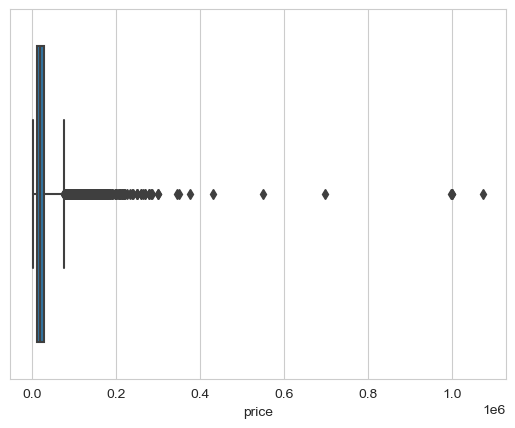

In [13]:
sns.boxplot(data = df, x = "price", whis = 3);

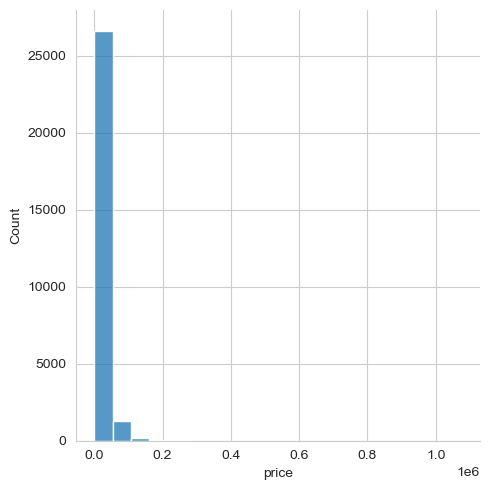

In [14]:
sns.displot(data = df, x = "price", bins = 20);

In [15]:
df.price.sort_values(ascending = False).head(20)

21452   1075900.00
27760    999999.00
27380    999999.00
21592    998000.00
1182     696900.00
21229    549000.00
21282    430000.00
1276     375900.00
21600    349000.00
1265     344900.00
1395     299000.00
1046     299000.00
1533     284780.00
683      283900.00
1389     279063.00
1084     279000.00
1279     268900.00
1362     267810.00
19031    264900.00
1348     259880.00
Name: price, dtype: float64

In [16]:
df.price.sort_values().head(20)

5702    490.00
19282   500.00
5371    500.00
17282   590.00
5210    600.00
5151    600.00
5156    699.00
3242    700.00
23408   700.00
5377    740.00
5139    750.00
7656    750.00
19829   750.00
24157   750.00
7679    790.00
2375    790.00
6310    790.00
5488    790.00
3017    799.00
5132    800.00
Name: price, dtype: float64

In [17]:
df.iloc[df.price.sort_values().head(30).index]

make_model     make  price      body_type  type  doors warranty  \
5702   Renault Megane  Renault 490.00          Coupe  Used   3.00       No   
19282   Nissan 100 NX   Nissan 500.00          Coupe  Used   3.00       No   
5371   Renault Megane  Renault 500.00    Convertible  Used   2.00       No   
17282    Toyota Paseo   Toyota 590.00          Coupe  Used   2.00       No   
5210   Renault Megane  Renault 600.00    Convertible  Used   2.00       No   
5151   Renault Megane  Renault 600.00    Convertible  Used   2.00       No   
5156   Renault Megane  Renault 699.00    Convertible  Used   2.00       No   
3242       Opel Astra     Opel 700.00          Coupe  Used   2.00       No   
23408  Hyundai ACCENT  Hyundai 700.00          Coupe  Used   2.00       No   
5377   Renault Megane  Renault 740.00    Convertible  Used   2.00       No   
5139   Renault Megane  Renault 750.00    Convertible  Used   2.00       No   
7656      Peugeot 306  Peugeot 750.00    Convertible  Used   2.00       No   
19829  Nissan Primera   Nissan 750.00  Station wagon  Used   5.00       No   
24157  Hyundai Lantra  Hyundai 750.00  Station wagon  Used   5.00       No   
7679      Peugeot 206  Peugeot 790.00    Convertible  Used   2.00       No   
2375       Opel Agila     Opel 790.00        Compact  Used   5.00       No   
6310   Renault Megane  Renault 790.00  Station wagon  Used   5.00       No   
5488   Renault Megane  Renault 790.00          Coupe  Used   3.00       No   
3017       Opel Astra     Opel 799.00    Convertible  Used   2.00       No   
5132   Renault Megane  Renault 800.00    Convertible  Used   2.00       No   
10477        Fiat Uno     Fiat 800.00          Coupe  Used   3.00       No   
3323       Opel Astra     Opel 800.00          Coupe  Used   2.00       No   
8030      Peugeot 307  Peugeot 800.00          Coupe  Used   2.00       No   
3854      Opel Vectra     Opel 850.00  Station wagon  Used   4.00       No   
11846      SEAT Arosa     SEAT 850.00        Compact  Used   3.00       No   
5199   Renault Megane  Renault 888.00    Convertible  Used   2.00       No   
5180   Renault Megane  Renault 890.00    Convertible  Used   2.00       No   
5259   Renault Megane  Renault 890.00    Convertible  Used   2.00       No   
7685      Peugeot 206  Peugeot 890.00    Convertible  Used   2.00       No   
7531      Peugeot 206  Peugeot 890.00    Convertible  Used   2.00       No   

        mileage    gearbox fuel_type  ... safety_&_security           extras  \
5702  216500.00     Manual   Benzine  ...   safety_standard     extras_basic   
19282 159000.00     Manual   Benzine  ...      safety_basic  extras_standard   
5371  225000.00     Manual   Benzine  ...   safety_standard     extras_basic   
17282 300000.00     Manual   Benzine  ...   safety_standard  extras_standard   
5210  146347.00     Manual   Benzine  ...   safety_standard  extras_standard   
5151  235828.00     Manual   Benzine  ...   safety_standard     extras_basic   
5156  172000.00     Manual   Benzine  ...   safety_standard  extras_standard   
3242  226000.00     Manual   Benzine  ...   safety_standard  extras_standard   
23408 218000.00     Manual    Diesel  ...      safety_basic     extras_basic   
5377  248054.00     Manual   Benzine  ...   safety_standard     extras_basic   
5139  144651.00     Manual   Benzine  ...   safety_standard  extras_standard   
7656  120214.00     Manual   Benzine  ...   safety_standard     extras_basic   
19829 240000.00     Manual   Benzine  ...   safety_standard     extras_basic   
24157 161000.00     Manual   Benzine  ...   safety_standard  extras_standard   
7679  255100.00     Manual   Benzine  ...   safety_standard     extras_basic   
2375  198455.00     Manual   Benzine  ...   safety_standard     extras_basic   
6310  256583.00     Manual    Diesel  ...   safety_standard     extras_basic   
5488  263000.00     Manual    Diesel  ...   safety_standard     extras_basic   
3017  151323.00     Manual   Benzine  ...   safety_standard  extras_stan

In [18]:
df.iloc[df.price.sort_values().tail(30).index]

make_model           make      price         body_type  \
793        Mercedes-Benz AMG GT  Mercedes-Benz  219000.00             Coupe   
429        Mercedes-Benz AMG GT  Mercedes-Benz  221500.00       Convertible   
885        Mercedes-Benz AMG GT  Mercedes-Benz  224885.00             Coupe   
1513     Mercedes-Benz G 63 AMG  Mercedes-Benz  232000.00  Off-Road/Pick-up   
19305               Nissan GT-R         Nissan  237500.00             Coupe   
418        Mercedes-Benz AMG GT  Mercedes-Benz  239000.00       Convertible   
1344     Mercedes-Benz G 63 AMG  Mercedes-Benz  248800.00  Off-Road/Pick-up   
1443     Mercedes-Benz G 63 AMG  Mercedes-Benz  249890.00  Off-Road/Pick-up   
21633               Ford Ranger           Ford  250000.00  Off-Road/Pick-up   
1525     Mercedes-Benz G 63 AMG  Mercedes-Benz  259000.00  Off-Road/Pick-up   
1348     Mercedes-Benz G 63 AMG  Mercedes-Benz  259880.00  Off-Road/Pick-up   
19031            Nissan Skyline         Nissan  264900.00             Coupe   
1362     Mercedes-Benz G 63 AMG  Mercedes-Benz  267810.00  Off-Road/Pick-up   
1279     Mercedes-Benz G 63 AMG  Mercedes-Benz  268900.00  Off-Road/Pick-up   
1084          Mercedes-Benz SLS  Mercedes-Benz  279000.00             Coupe   
1389     Mercedes-Benz G 63 AMG  Mercedes-Benz  279063.00  Off-Road/Pick-up   
683        Mercedes-Benz AMG GT  Mercedes-Benz  283900.00       Convertible   
1533     Mercedes-Benz G 63 AMG  Mercedes-Benz  284780.00  Off-Road/Pick-up   
1395   Mercedes-Benz GLE 63 AMG  Mercedes-Benz  299000.00  Off-Road/Pick-up   
1046   Mercedes-Benz GLE 63 AMG  Mercedes-Benz  299000.00             Coupe   
1265     Mercedes-Benz G 63 AMG  Mercedes-Benz  344900.00  Off-Road/Pick-up   
21600                  Ford 200           Ford  349000.00             Coupe   
1276     Mercedes-Benz G 63 AMG  Mercedes-Benz  375900.00  Off-Road/Pick-up   
21282                   Ford GT           Ford  430000.00             Coupe   
21229                   Ford GT           Ford  549000.00             Coupe   
1182     Mercedes-Benz G 63 AMG  Mercedes-Benz  696900.00  Off-Road/Pick-up   
21592                   Ford GT           Ford  998000.00             Coupe   
27380                 Volvo 240          Volvo  999999.00     Station wagon   
27760                 Volvo 240          Volvo  999999.00     Station wagon   
21452                   Ford GT           Ford 1075900.00             Coupe   

                 type  doors warranty   mileage    gearbox fuel_type  ...  \
793              Used   2.00      Yes   3800.00  Automatic   Benzine  ...   
429              Used   3.00      Yes   8900.00  Automatic   Benzine  ...   
885     Demonstration   4.00      Yes   9900.00  Automatic   Benzine  ...   
1513             Used   5.00      Yes  16000.00  Automatic   Benzine  ...   
19305            Used   2.00       No     57.00  Automatic   Benzine  ...   
418    Employee's car   2.00      Yes    100.00  Automatic   Benzine  ...   
1344             Used   4.00      Yes   8800.00  Automatic   Benzine  ...   
1443             Used   4.00      Yes   2901.00  Automatic   Benzine  ...   
21633            Used   4.00       No   2813.00  Automatic   Benzine  ...   
1525             Used   5.00      Yes   4003.00  Automatic   Benzine  ...   
1348    Demonstration   5.00      Yes   9900.00  Automatic   Benzine  ...   
19031            Used   2.00       No  45000.00     Manual   Benzine  ...   
1362    Demonstration   5.00       No   3003.00  Automatic   Benzine  ...   
1279   Pre-registered   5.00      Yes   1800.00  Automatic   Benzine  ...   
1084             Used   2.00       No  30000.00  Automatic   Benzine  ...   
1389    Demonstration   5.00       No   9900.00  Automatic   Benzine  ...   
683              Used   3.00      Yes   3569.00  Automatic   Benzine  ...   
1533    Demonstration   5.00      Yes   9900.00  Automatic   Benzine  ...   
1395    Demonstration   4.00      Yes   8000.00  Automatic   Benzine  ...   
1046    Demonstration   4.00   

In [19]:
df.loc[df["make_model"] == "Mercedes-Benz G 63 AMG"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]].style.apply(highlight, subset=["price"])


In [20]:
df.loc[df["make_model"] == "Volvo 240"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]].style.apply(highlight, subset=["price"])

In [21]:
df.loc[df["make_model"] == "Ford GT"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]].style.apply(highlight, subset=["price"])


In [22]:
df.loc[df["make_model"] == "Nissan Skyline"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]].style.apply(highlight, subset=["price"])


In [23]:
df.loc[df["make_model"] == "Mercedes-Benz AMG GT"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]].style.apply(highlight, subset=["price"])


In [24]:
df.loc[df["make_model"] == "Mercedes-Benz SLS"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]].style.apply(highlight, subset=["price"])


In [25]:
df.loc[df["make_model"] == "Ford 200"][["make_model", "price", "age", "body_type", "mileage", "engine_size"]].style.apply(highlight, subset=["price"])


In [26]:
df.iloc[df.price.sort_values().tail(30).index]["make_model"].unique()

array(['Mercedes-Benz AMG GT', 'Mercedes-Benz G 63 AMG', 'Nissan GT-R',
       'Ford Ranger', 'Nissan Skyline', 'Mercedes-Benz SLS',
       'Mercedes-Benz GLE 63 AMG', 'Ford 200', 'Ford GT', 'Volvo 240'],
      dtype=object)

In [27]:
df.iloc[df.price.sort_values().head(30).index]["make_model"].unique()

array(['Renault Megane', 'Nissan 100 NX', 'Toyota Paseo', 'Opel Astra',
       'Hyundai ACCENT', 'Peugeot 306', 'Nissan Primera',
       'Hyundai Lantra', 'Peugeot 206', 'Opel Agila', 'Fiat Uno',
       'Peugeot 307', 'Opel Vectra', 'SEAT Arosa'], dtype=object)

In [28]:
df.drop(df[(df["make_model"] == "Mercedes-Benz G 63 AMG") & (df['price'] >= 380000)].index, inplace=True)
df.drop(df[(df["make_model"] == "Volvo 240") & (df['price'] >= 20000)].index, inplace=True)
df.drop(df[(df["make_model"] == "Ford GT") & (df['price'] >= 600000)].index, inplace=True)
df.drop(df[(df["make_model"] == 'Nissan Skyline') & (df['price'] >= 100000)].index, inplace=True)
df.drop(df[(df["make_model"] == 'Mercedes-Benz AMG GT') & (df['price'] >= 185000)].index, inplace=True)

In [29]:
df.price.sort_values().tail(30)

19331   200000.00
19222   205000.00
548     207113.00
21596   208101.00
19316   209000.00
588     209000.00
585     209000.00
596     209850.00
1432    213900.00
10206   214900.00
760     217900.00
1513    232000.00
19305   237500.00
1344    248800.00
1443    249890.00
21633   250000.00
1525    259000.00
1348    259880.00
1362    267810.00
1279    268900.00
1084    279000.00
1389    279063.00
1533    284780.00
1046    299000.00
1395    299000.00
1265    344900.00
21600   349000.00
1276    375900.00
21282   430000.00
21229   549000.00
Name: price, dtype: float64

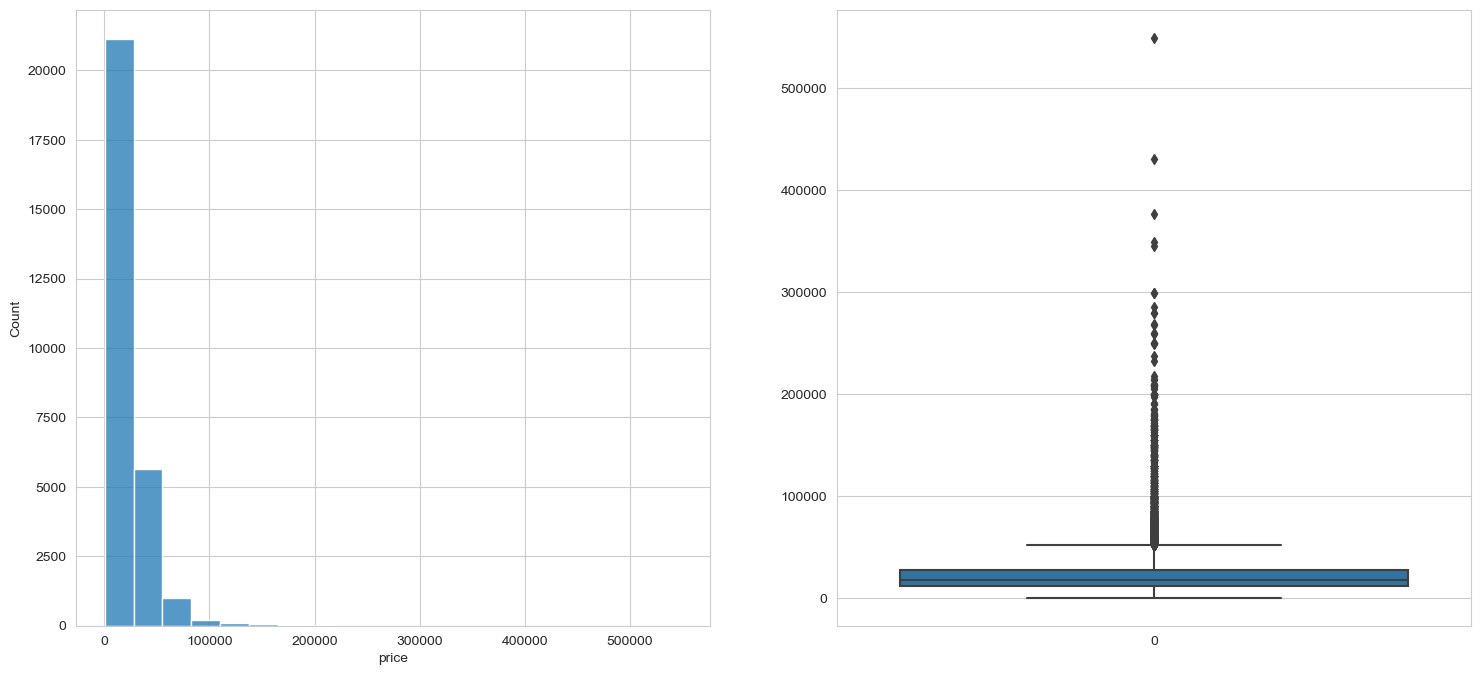

In [30]:
plt.figure(figsize=(18, 8))
plt.subplot(1,2,1)
sns.histplot(df.price, bins=20)

plt.subplot(1,2,2)
sns.boxplot(df.price);

In [31]:
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1
low_whisker  = q1-1.5*iqr
high_whisker = q3+1.5*iqr

In [32]:
df.shape

(28182, 31)

In [33]:
df = df.loc[(df["price"] > low_whisker) & (df["price"] < high_whisker)]

In [34]:
#df.drop(df.loc[(df["price"] <= low_whisker) & (df["price"] >= high_whisker)].index, axis = 0, inplace = True)

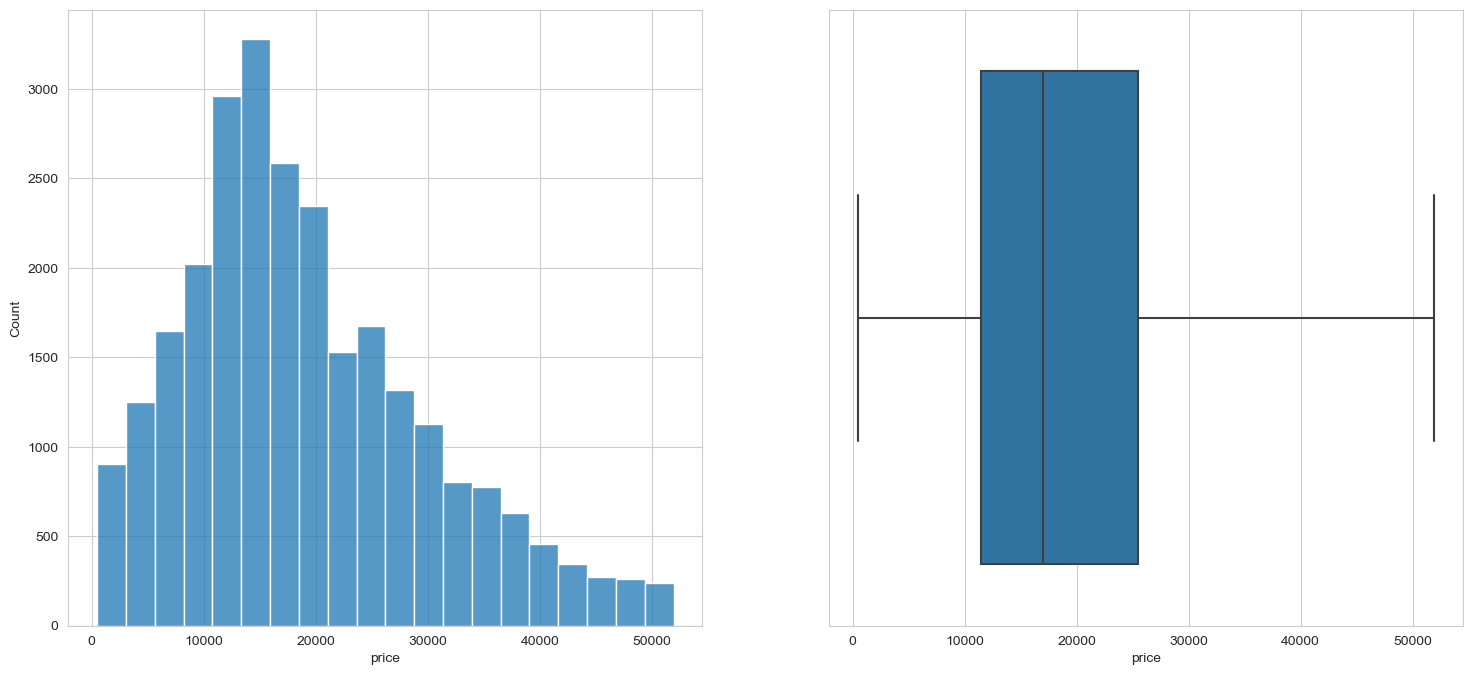

In [35]:
plt.figure(figsize=(18, 8))
plt.subplot(1,2,1)
sns.histplot(df.price, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "price", whis = 2);

In [36]:
first_looking("price")


column name    :  price
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  3983
14990.00    221
12990.00    219
16990.00    185
19990.00    164
9990.00     160
           ... 
9440.00       1
18230.00      1
27765.00      1
15159.00      1
4440.00       1
Name: price, Length: 3983, dtype: int64


<a id="4"></a>
<div class="alert alert-info" role="alert">
<h1>Age<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [37]:
first_looking("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  76
3.00       3431
4.00       3301
0.00       2506
5.00       2351
1.00       2332
           ... 
-180.00       1
90.00         1
94.00         1
122.00        1
-3.00         1
Name: age, Length: 76, dtype: int64


In [38]:
df.age.sort_values(ascending=False).head(20)

24389   122.00
21050    94.00
21017    90.00
9098     76.00
26263    68.00
26091    68.00
21000    67.00
21044    67.00
3126     65.00
21487    65.00
21152    65.00
21011    64.00
21022    64.00
21098    63.00
13785    63.00
26059    62.00
10172    62.00
26231    62.00
20927    61.00
26205    61.00
Name: age, dtype: float64

In [39]:
df.age.sort_values(ascending=False).tail(20)

2577       0.00
17586      0.00
17577      0.00
2572       0.00
17574      0.00
17572      0.00
17569      0.00
2567       0.00
2566       0.00
17566      0.00
17563      0.00
17562      0.00
2561       0.00
17554      0.00
17553      0.00
2558       0.00
10623      0.00
18930     -1.00
9602      -3.00
6859    -180.00
Name: age, dtype: float64

In [40]:
df.loc[df.age.sort_values(ascending=False).tail(20).index, ["make_model", "age"]]

make_model     age
2577           Opel Corsa    0.00
17586         Toyota C-HR    0.00
17577  Toyota Yaris Cross    0.00
2572           Opel Corsa    0.00
17574         Toyota Aygo    0.00
17572         Toyota C-HR    0.00
17569       Toyota Proace    0.00
2567           Opel Corsa    0.00
2566           Opel Corsa    0.00
17566         Toyota C-HR    0.00
17563       Toyota Proace    0.00
17562        Toyota Yaris    0.00
2561           Opel Corsa    0.00
17554         Toyota C-HR    0.00
17553        Toyota Yaris    0.00
2558           Opel Corsa    0.00
10623            Fiat 500    0.00
18930        Nissan Micra   -1.00
9602      Fiat 500 Abarth   -3.00
6859         Renault Clio -180.00

In [41]:
df.age = df.age.transform(lambda x: np.nan if (x < 0) | ( (x > 1.39)  & (x < 1.50))  else x)

In [42]:
df.loc[df.age.sort_values(ascending=False).tail(20).index, ["make_model", "age"]]

make_model  age
2501             Opel Corsa 0.00
2500             Opel Corsa 0.00
8890            Peugeot 508 0.00
2496             Opel Corsa 0.00
22226  Ford Tourneo Connect 0.00
8885            Peugeot 308 0.00
2492             Opel Corsa 0.00
2491             Opel Corsa 0.00
22217            Ford Focus 0.00
2489             Opel Corsa 0.00
9437             Fiat Panda 0.00
2486             Opel Corsa 0.00
2485             Opel Corsa 0.00
22214            Ford Focus 0.00
2482             Opel Corsa 0.00
6730         Renault Captur 0.00
6859           Renault Clio  NaN
9602        Fiat 500 Abarth  NaN
16652        Toyota Corolla  NaN
18930          Nissan Micra  NaN

In [43]:
df.iloc[df.age.sort_values(ascending=True).head(20).index]

make_model     make    price         body_type            type  \
23754       Hyundai KONA  Hyundai 22930.00  Off-Road/Pick-up            Used   
9604            Fiat 500     Fiat  8200.00           Compact            Used   
9593            Fiat 500     Fiat 19950.00           Compact  Pre-registered   
9585            Fiat 500     Fiat 11090.00           Compact            Used   
9567            Fiat 500     Fiat 14500.00           Compact            Used   
9562            Fiat 500     Fiat 17500.00           Compact            Used   
19082        Nissan 350Z   Nissan 15900.00             Coupe            Used   
16929       Toyota Paseo   Toyota  4500.00       Convertible            Used   
16930        Toyota MR 2   Toyota 10990.00       Convertible            Used   
9554            Fiat 500     Fiat 17000.00           Compact  Pre-registered   
9606            Fiat 500     Fiat 10800.00           Compact            Used   
9531           Fiat Tipo     Fiat 12998.00           Compact            Used   
9522   Fiat Grande Punto     Fiat  3690.00           Compact            Used   
18023     Toyota Avensis   Toyota 17600.00     Station wagon            Used   
18021     Toyota Avensis   Toyota  3900.00     Station wagon            Used   
19087        Nissan 370Z   Nissan 30864.00             Coupe            Used   
9504            Fiat 500     Fiat 12500.00           Compact            Used   
23392        Hyundai i30  Hyundai 10000.00             Coupe            Used   
9490            Fiat 500     Fiat 13290.00           Compact            Used   
19098        Nissan 370Z   Nissan 33999.00             Coupe            Used   

       doors warranty   mileage    gearbox fuel_type  ... safety_&_security  \
23754   5.00       No  26551.00  Automatic   Benzine  ...    safety_premium   
9604    3.00      Yes  81000.00     Manual   Benzine  ...   safety_standard   
9593    3.00      Yes      1.00     Manual    Hybrid  ...    safety_premium   
9585    3.00      Yes  50871.00  Automatic   Benzine  ...   safety_standard   
9567    3.00       No  13630.00     Manual   Benzine  ...   safety_standard   
9562    3.00       No  10000.00     Manual    Hybrid  ...   safety_standard   
19082   2.00      Yes 111242.00     Manual   Benzine  ...   safety_standard   
16929   2.00       No 251000.00     Manual   Benzine  ...   safety_standard   
16930   2.00       No  43000.00     Manual   Benzine  ...   safety_standard   
9554    3.00      Yes    500.00     Manual  Electric  ...   safety_standard   
9606    3.00      Yes 115000.00     Manual   Benzine  ...   safety_standard   
9531    5.00      Yes  41018.00     Manual    Diesel  ...   safety_standard   
9522    3.00      Yes 108867.00     Manual   Benzine  ...   safety_standard   
18023   5.00      Yes 123465.00     Manual    Diesel  ...   safety_standard   
18021   5.00      Yes 350000.00     Manual    Diesel  ...   safety_standard   
19087   3.00      Yes  29615.00     Manual   Benzine  ...   safety_standard   
9504    3.00      Yes  30970.00     Manual    Diesel  ...   safety_standard   
23392   3.00       No  96000.00     Manual   Benzine  ...   safety_standard   
9490    3.00       No  19379.00     Manual   Benzine  ...   safety_standard   
19098   3.00      Yes  60000.00     Manual   Benzine  ...   safety_standard   

                extras  empty_weight  full_service_history    upholstery  \
23754  extras_standard       1482.00                   Yes  leather_hols   
9604      extras_basic        865.00                   Yes   fabric_hols   
9593   extras_standard       1055.00                   Yes   fabric_hols   
9585      extras_basic        915.00                   Yes   fabric_hols   
9567      extras_basic        955.00                   Yes   fabric_hols   
9562      extras_basic        980.00                    No   fabric_hols   
19082     extras_basic       1720.00                   Yes  leather_hols   
16929     extras_basic       1055.00                    No   fabr

In [44]:
df.age.describe()

count   26431.00
mean        6.97
std         8.26
min         0.00
25%         2.00
50%         4.00
75%         9.00
max       122.00
Name: age, dtype: float64

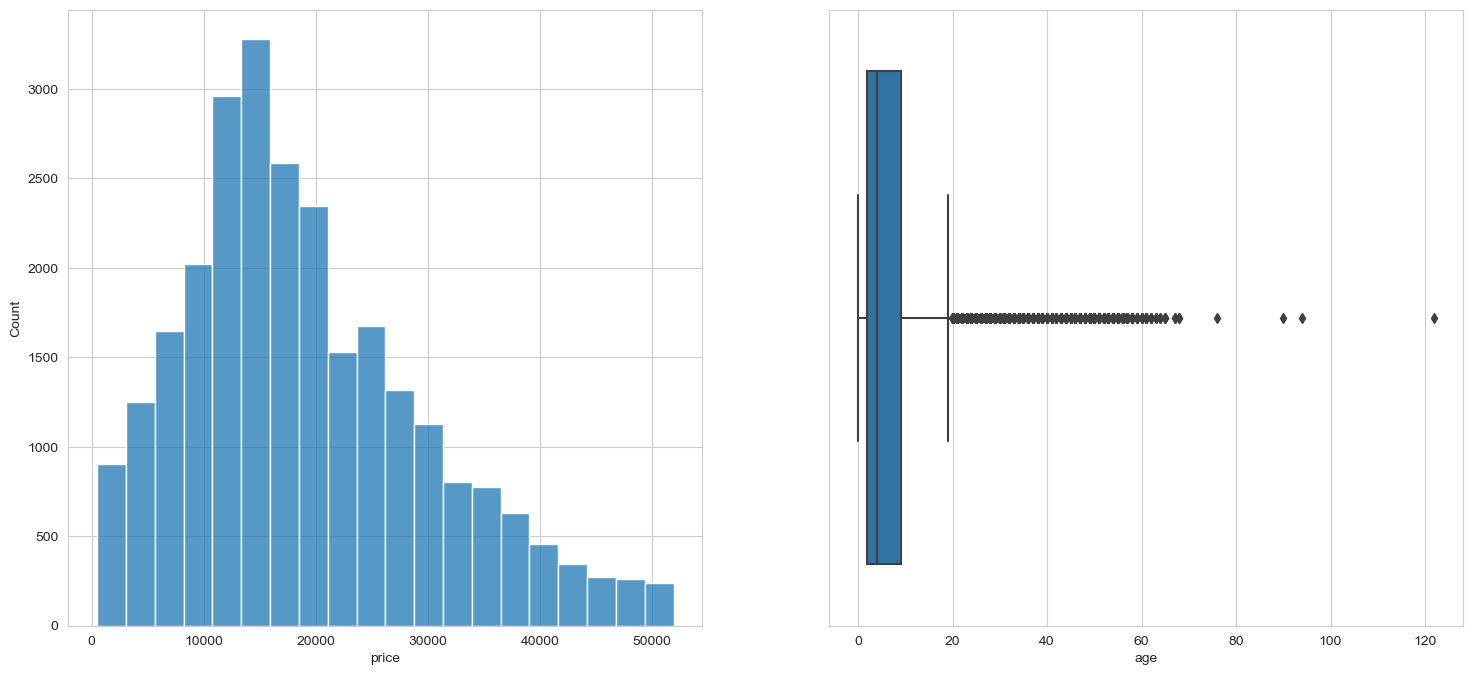

In [45]:
plt.figure(figsize=(18, 8))
plt.subplot(1,2,1)
sns.histplot(df.price, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "age");

In [46]:
df.age.value_counts()

3.00      3431
4.00      3301
0.00      2506
5.00      2351
1.00      2332
          ... 
68.00        2
76.00        1
90.00        1
94.00        1
122.00       1
Name: age, Length: 72, dtype: int64

In [47]:
# Most of the cars produced eralier that 2000 is considered differently compared to cars that younger than 20 years. 
# Therefore cars that younger than 20 years have been dropped.
df.loc[df["age"] < 20][["make_model", "mileage", "price", "age"]].sort_values(by = "age", ascending = False)

make_model   mileage    price   age
7655     Peugeot 206 223737.00  1495.00 19.00
7485     Peugeot 206 107800.00  3300.00 19.00
16903    Toyota MR 2  90000.00  9950.00 19.00
16892    Toyota MR 2 140728.00 10500.00 19.00
16890    Toyota MR 2  77200.00 10990.00 19.00
...              ...       ...      ...   ...
16482    Toyota Aygo   2900.00 23030.00  0.00
16480    Toyota Aygo      4.00 16959.00  0.00
16477  Toyota Aygo X     10.00 21990.00  0.00
16474    Toyota Aygo   1300.00 22250.00  0.00
11571     Fiat Panda      1.00 18690.00  0.00

[24697 rows x 4 columns]

In [48]:
df.loc[df["age"] > 20][["make_model", "mileage", "price", "age"]].sort_values(by = "age", ascending = False)

make_model   mileage    price    age
24389  Hyundai IONIQ  29961.00 26991.00 122.00
21050    Ford Cabrio   5000.00 14490.00  94.00
21017     Ford Coupe  15000.00 40000.00  90.00
9098     Peugeot 504 180000.00 12500.00  76.00
26263    Volvo PV544  99300.00 19900.00  68.00
...              ...       ...      ...    ...
3148      Opel Astra 220000.00  5000.00  21.00
26049      Volvo C70 139000.00  6999.00  21.00
3147      Opel Astra  85250.00 10000.00  21.00
17329  Toyota Celica   2000.00 14000.00  21.00
16860    Toyota MR 2  61140.00 10900.00  21.00

[1554 rows x 4 columns]

In [49]:
df.drop(df.loc[(df["age"] > 20) | (df["age"].isnull())][["make_model", "mileage", "price", "age"]].sort_values(by = "age", ascending = False).index, inplace = True)

In [50]:
df.age.value_counts(dropna = False)

3.00     3431
4.00     3301
0.00     2506
5.00     2351
1.00     2332
2.00     2210
6.00     1447
7.00     1217
8.00      916
9.00      680
10.00     645
11.00     638
12.00     543
15.00     490
14.00     439
13.00     416
16.00     395
17.00     284
18.00     246
19.00     210
20.00     180
Name: age, dtype: int64

<a id="5
       "></a>
<div class="alert alert-info" role="alert">
<h1>Mileage<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [51]:
first_looking("mileage")

column name    :  mileage
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  12870
10.00        531
1.00         149
50.00        120
5.00         102
100.00        99
            ... 
156171.00      1
93280.00       1
55445.00       1
153213.00      1
230047.00      1
Name: mileage, Length: 12870, dtype: int64


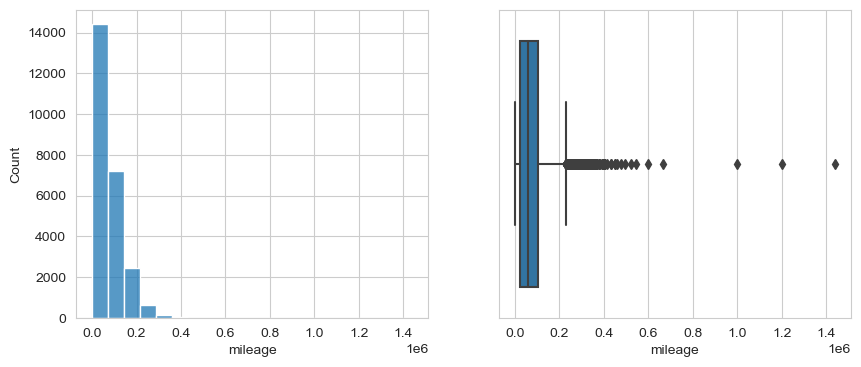

In [52]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(df.mileage, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "mileage");

In [53]:
def high(x):
    print("top values")
    print(x.value_counts(ascending = False).head(20))
    print("-"*15)
    print("bottom values")
    print(x.value_counts(ascending = False).tail(20))

    

In [54]:
high(df.mileage)

top values
10.00        531
1.00         149
50.00        120
5.00         102
100.00        99
20.00         92
15.00         85
5000.00       84
100000.00     62
2.00          61
90000.00      57
160000.00     54
60000.00      49
3000.00       48
80000.00      48
150000.00     46
15000.00      46
120000.00     45
89000.00      44
1500.00       44
Name: mileage, dtype: int64
---------------
bottom values
53625.00     1
32781.00     1
240536.00    1
135227.00    1
31694.00     1
58259.00     1
154789.00    1
68610.00     1
23560.00     1
106922.00    1
77857.00     1
48461.00     1
79809.00     1
54799.00     1
46088.00     1
156171.00    1
93280.00     1
55445.00     1
153213.00    1
230047.00    1
Name: mileage, dtype: int64


In [55]:
df["mileage"].sort_values(ascending=True).head(20)

11274   0.00
16145   0.00
23914   0.00
11037   0.00
4315    0.00
6287    0.00
10908   0.00
10772   0.00
15728   0.00
22507   0.00
3546    0.00
3576    0.00
21810   0.00
10095   0.00
4495    0.00
22582   0.00
14609   0.00
10812   0.00
14566   0.00
21504   0.00
Name: mileage, dtype: float64

In [56]:
df.loc[df["mileage"].sort_values(ascending=True).head(20).index][["make_model", "mileage", "price", "age"]]

make_model  mileage    price  age
11274         Fiat Tipo     0.00 22250.00 0.00
16145     Dacia Sandero     0.00 16490.00 0.00
23914       Hyundai i10     0.00 14590.00 0.00
11037         Fiat Tipo     0.00 20700.00 0.00
4315         Opel Corsa     0.00 26980.00 0.00
6287     Renault Espace     0.00 45490.00 1.00
10908         Fiat Tipo     0.00 24500.00 1.00
10772         Fiat 500X     0.00 21300.00 0.00
15728       Dacia Lodgy     0.00 19500.00 0.00
22507        Ford Focus     0.00 20790.00 1.00
3546   Opel Crossland X     0.00 23650.00 0.00
3576     Opel Crossland     0.00 24990.00 1.00
21810         Ford Kuga     0.00 32200.00 0.00
10095          Fiat 500     0.00 27000.00 0.00
4495      Opel Insignia     0.00 48890.00 1.00
22582        Ford Focus     0.00 29970.00 0.00
14609       Skoda Scala     0.00 33117.00 0.00
10812         Fiat 500X     0.00 28690.00 0.00
14566       Skoda Kamiq     0.00 22790.00 0.00
21504      Ford Mustang     0.00 45995.00 5.00

In [57]:
df.loc[df.mileage.sort_values().tail(20).index][["make_model", "mileage", "price", "age"]]

make_model    mileage    price   age
26285       Volvo C30  400332.00  2750.00 13.00
26113       Volvo C30  400332.00  2750.00 13.00
24116     Hyundai i40  402000.00  4950.00  8.00
8967      Peugeot 407  402933.00  1990.00 17.00
2279       Opel Corsa  406000.00  3900.00 10.00
14205    Skoda Superb  415000.00 11500.00  5.00
27817       Volvo V70  433850.00  2945.00 15.00
27437       Volvo V70  433850.00  2945.00 15.00
27808       Volvo V70  448914.00  4885.00 14.00
27428       Volvo V70  448914.00  4885.00 14.00
6344   Renault Laguna  461626.00  1250.00 18.00
19807   Nissan Evalia  477000.00  8000.00  8.00
3323       Opel Astra  494457.00   800.00 17.00
18101  Toyota Avensis  523992.00  6600.00  7.00
14187   Skoda Octavia  546888.00  6500.00  8.00
14173    Skoda Superb  600000.00  4500.00 11.00
12981   SEAT Altea XL  667128.00  3400.00 12.00
22542     Ford Fiesta 1000001.00  9990.00  4.00
11997      SEAT Ibiza 1199900.00 10200.00  4.00
18598    Nissan Micra 1440000.00 14400.00  3.00

In [58]:
df[df["make_model"] == "Volvo V70"][["make_model", "mileage", "price", "age"]].style.apply(highlight, subset=["mileage"])

In [59]:
# it has been identified that 11,300 km is the ave km driven on EU.
# It has been also identified that mileage can vary in terms of location country
# On the other hand Body Type is also one of the key factors in determining mileage of a vehicle

In [60]:
df.mileage = df.mileage.apply(lambda x: np.nan if (x > 250000 and df.loc[df['mileage'] == x, 'age'].values[0] > 10) else\
                                    np. nan if x > 380000 else x)

In [61]:
df.mileage.isnull().sum()

319

In [62]:
# it has been concluded that ["make_model", "age", "location_country", "mile_class", "body_type"] has direct effect on mileage of a vehicle 
df.mileage.fillna(df.groupby(["make_model", "age", "location_country", "mile_class", "body_type"])\
                  ["mileage"].transform(lambda x: x.mean()), inplace = True)

In [63]:
df.mileage.isnull().sum()

252

In [64]:
# NaN outliers have been filled by ["age", "location_country", "mile_class", "body_type"] groups
df.mileage.fillna(df.groupby(["age", "location_country", "mile_class", "body_type"])\
                  ["mileage"].transform(lambda x: x.mean()), inplace = True)

In [65]:
df.mileage.isnull().sum()

162

In [66]:
# NaN outliers have been filled by ["age", "location_country", "body_type"] groups
df.mileage.fillna(df.groupby(["age", "location_country", "body_type"])\
                  ["mileage"].transform(lambda x: x.mean()), inplace = True)

In [67]:
df.mileage.isnull().sum()

7

In [68]:
# NaN outliers have been filled by ["age", "location_country"] groups
df.mileage.fillna(df.groupby(["age", "location_country", "mile_class"])\
                  ["mileage"].transform(lambda x: x.mean()), inplace = True)

In [69]:
df.mileage.isnull().sum()

1

In [70]:
df.mileage.fillna(df.groupby(["age", "location_country"])\
                  ["mileage"].transform(lambda x: x.mean()), inplace = True)

In [71]:
df.mileage.isnull().sum()

0

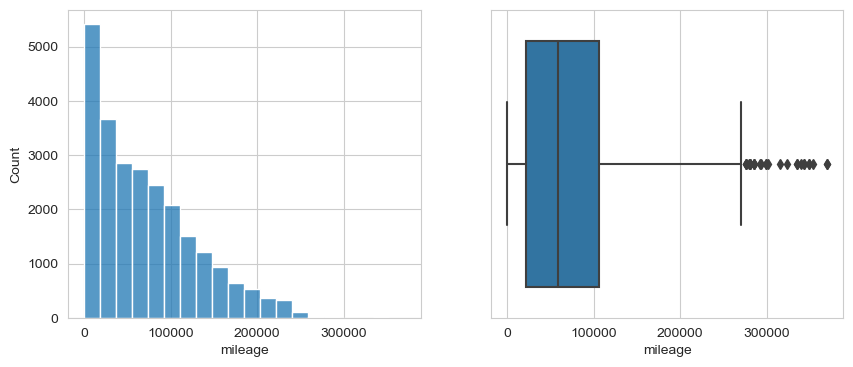

In [72]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(df.mileage, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "mileage", whis = 2.0);

<a id="6"></a>
<div class="alert alert-info" role="alert">
<h1>Fuel Consumption<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [73]:
df.fuel_consumption.sort_values().tail(20)

20705    173.01
20754    173.01
21207    175.90
18605    319.31
18505    319.31
18697    319.31
18730    319.31
18503    319.31
19620    482.20
23588    509.30
23756    509.30
18303    538.20
6430     547.80
1706     586.20
18532    960.00
18533    960.00
251      960.00
20680   1019.30
20697   1019.30
22657   1094.90
Name: fuel_consumption, dtype: float64

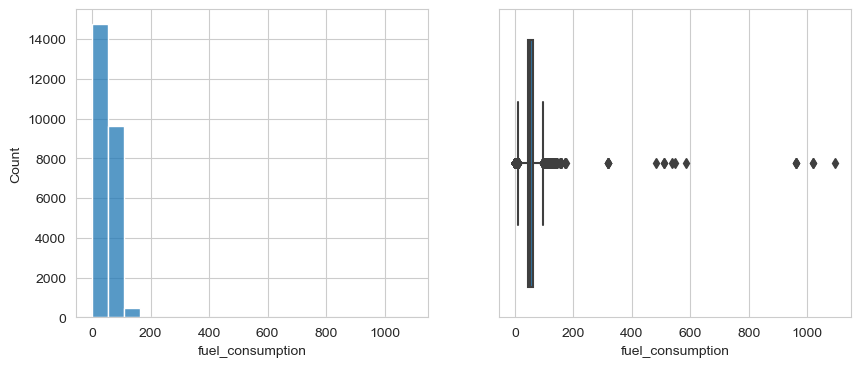

In [74]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(df.fuel_consumption, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "fuel_consumption", whis = 2.0);

In [75]:
df["fuel_consumption"].sort_values(ascending=False).head(20)

22657   1094.90
20680   1019.30
20697   1019.30
18533    960.00
251      960.00
18532    960.00
1706     586.20
6430     547.80
18303    538.20
23588    509.30
23756    509.30
19620    482.20
18730    319.31
18697    319.31
18605    319.31
18505    319.31
18503    319.31
21207    175.90
20754    173.01
20705    173.01
Name: fuel_consumption, dtype: float64

In [76]:
# highest fuel consumption by models has been identified.
df.loc[df["fuel_consumption"].sort_values(ascending=False).head(20).index][["make_model", "fuel_type", "fuel_consumption"]]

make_model fuel_type  fuel_consumption
22657           Ford Focus    Diesel           1094.90
20680           Ford Focus    Diesel           1019.30
20697           Ford Focus    Diesel           1019.30
18533       Nissan Qashqai   Benzine            960.00
251    Mercedes-Benz A 180   Benzine            960.00
18532       Nissan Qashqai   Benzine            960.00
1706   Mercedes-Benz E 200   Benzine            586.20
6430        Renault Megane   Benzine            547.80
18303         Toyota Yaris   Benzine            538.20
23588         Hyundai KONA   Benzine            509.30
23756         Hyundai KONA   Benzine            509.30
19620       Nissan Qashqai    Diesel            482.20
18730       Nissan Qashqai   Benzine            319.31
18697       Nissan Qashqai   Benzine            319.31
18605       Nissan Qashqai   Benzine            319.31
18505       Nissan Qashqai   Benzine            319.31
18503       Nissan Qashqai   Benzine            319.31
21207         Ford Mustang   Benzine            175.90
20754           Ford Focus    Diesel            173.01
20705           Ford Focus    Diesel            173.01

In [77]:
#df[df["make_model"] == "Ford Focus"][["make_model","age", "fuel_type", "fuel_consumption", "body_type"]].style.apply(highlight, subset=["fuel_consumption"])
#df[df["make_model"] == "Nissan Qashqai"][["make_model","age", "fuel_type", "fuel_consumption", "body_type"]].style.apply(highlight, subset=["fuel_consumption"])
#df[df["make_model"] == "Mercedes-Benz ML 63 AMG"][["make_model","age", "fuel_type", "fuel_consumption","body_type", "engine_size"]].style.apply(highlight, subset=["fuel_consumption"])
#df[df["make_model"] == "Peugeot 307"][["make_model","age", "fuel_type", "fuel_consumption","body_type", "engine_size"]].style.apply(highlight, subset=["fuel_consumption"])
 

In [78]:
# it has been identified that body type and engine size has direct effect on fuel consumption
# automobiles which is not electric and has 0-10 kwh fuel_consumtion has been considered as missing.
# not offroad and below 2.5 engine size models unlikely to have above 120 kwh. 
# Hence these values are also considered as missing
df.fuel_consumption = df.apply(lambda x: np.nan if (x["fuel_consumption"] > 120 and x["engine_size"] < 2.5) \
                                             or (x["fuel_type"] != "Electric" and x["fuel_consumption"] < 10) \
                                             else x["fuel_consumption"], axis=1)


In [79]:
# zero fuel_consumption electric cars are considered as missing via class comparison.
df.fuel_consumption = df.apply(lambda x: np.nan if (x["fuel_type"] == "Electric" and x["fuel_consumption"] == 0) \
                                             else x["fuel_consumption"], axis=1 )


In [80]:
df[df["fuel_type"] == "Electric"][["make_model","age", "fuel_type", "fuel_consumption","body_type", "engine_size"]].style.apply(highlight, subset=["fuel_consumption"])

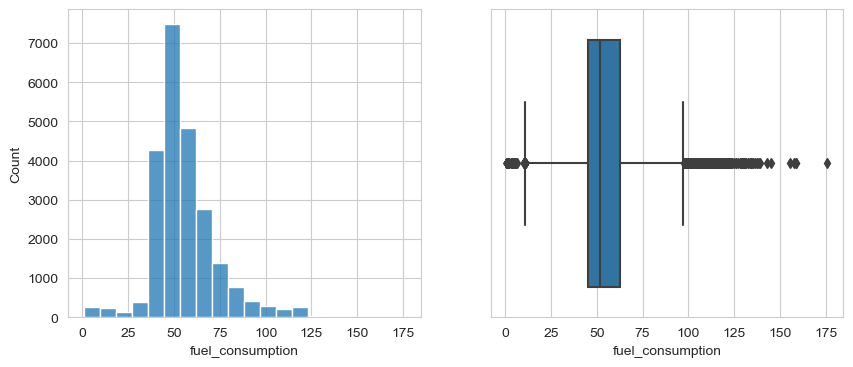

In [81]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(df.fuel_consumption, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "fuel_consumption", whis = 2.0);

In [82]:
df.groupby(["make_model","fuel_type","engine_class"])["fuel_consumption"].transform(lambda x: x.mean()).unique()

array([ 41.96666667,  70.06263158,  53.7       ,  65.125     ,
        58.8       ,  46.11017081,  67.06      ,  57.17737586,
        44.36838095,  53.53681225,  52.04739011,  52.17738562,
        47.28333333,  55.26      ,  62.8       ,  46.99      ,
        60.43944954,  49.9875    ,  54.90767644,  49.51511563,
        47.14      ,  54.06666667,  67.55870968,          nan,
        50.11344538,  74.61044372,  55.7625    ,  75.95      ,
        74.34615385,  94.3512987 ,  46.        ,  84.1       ,
        86.32      , 108.57361111, 145.1       ,  74.18571429,
        52.325     ,  88.9       ,  62.77777778,  95.11666667,
        81.02403846, 105.95      ,  79.75      , 118.2       ,
        61.88785714,  90.66666667,  54.43333333,  65.93076923,
        61.14251012,  64.79517241,  64.06666667,  62.43971861,
        53.062     ,  50.91803967,  67.34285714,  58.48277778,
        51.64365714,  60.5       , 132.79166667,  86.83088235,
        99.9       ,  66.3       ,  75.15074074, 135.5 

In [83]:
df.fuel_consumption.fillna(df.groupby(["make_model","fuel_type","body_type"])["fuel_consumption"].transform(lambda x: np.mean(x)), inplace = True)
df.fuel_consumption.isnull().sum()

337

In [84]:
df.fuel_consumption.fillna(df.groupby(["make_model","fuel_type","engine_class"])["fuel_consumption"].transform(lambda x: np.mean(x)), inplace = True)
df.fuel_consumption.isnull().sum()

315

In [85]:
df.fuel_consumption.fillna(df.groupby(["fuel_type","engine_class"])["fuel_consumption"].transform(lambda x: np.mean(x)), inplace = True)
df.fuel_consumption.isnull().sum()

0

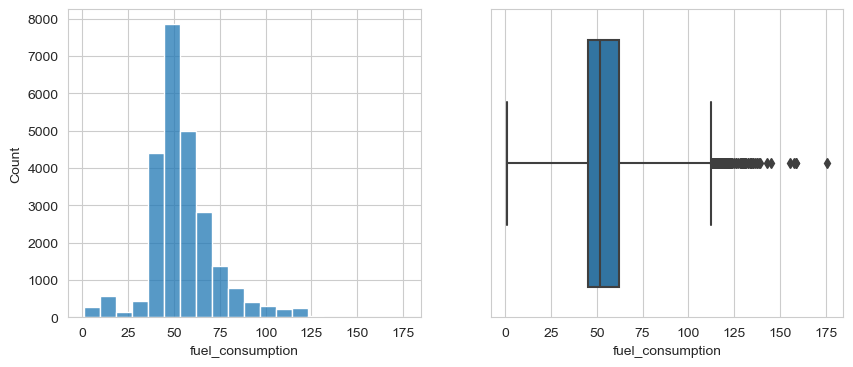

In [86]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
sns.histplot(df.fuel_consumption, bins=20)

plt.subplot(1,2,2)
sns.boxplot(data = df, x = "fuel_consumption", whis = 3.0);

<a id="7"></a>
<div class="alert alert-info" role="alert">
<h1>Engine Size<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

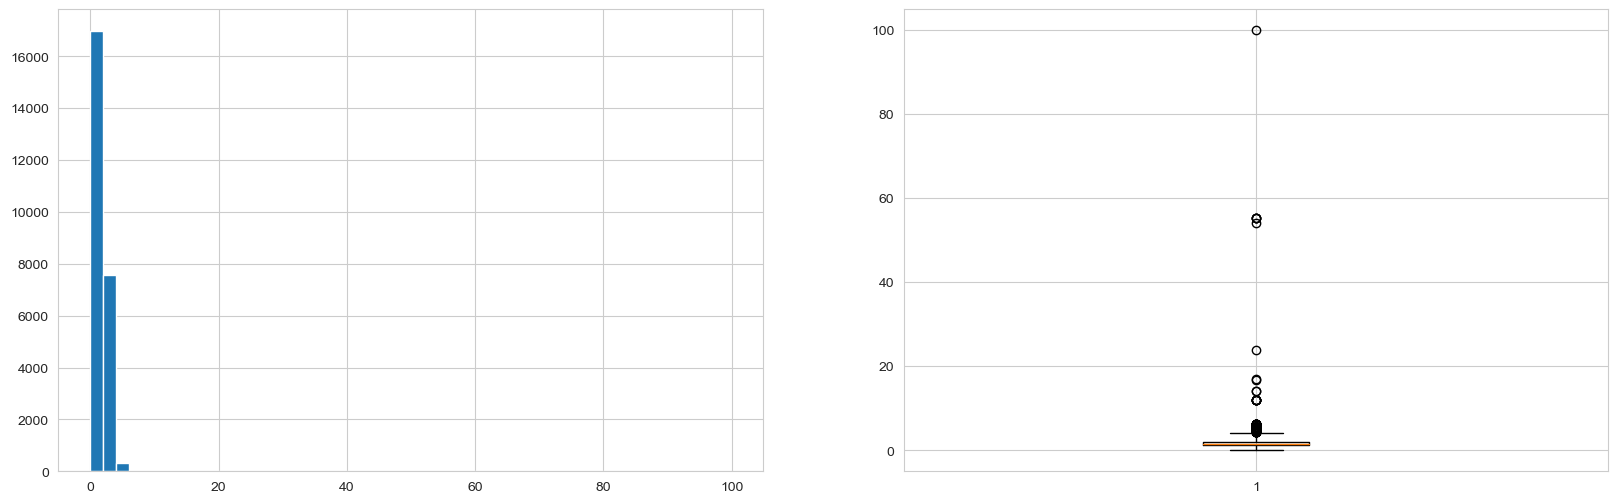

In [87]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=50)

plt.subplot(122)
plt.boxplot(df["engine_size"], whis=2.5)  # boxplot based on 2.5 whisker

plt.show()

In [88]:
df.sort_values(by=["engine_size"], ascending=False)["engine_size"].head(20)


16324   99.90
24268   55.20
24269   55.20
24472   55.20
24271   55.20
21012   54.00
9377    23.80
5438    17.00
15883   16.60
5605    14.00
5774    14.00
9378    11.90
9352    11.90
9360    11.90
9365    11.90
9376    11.90
9458    11.90
9370    11.90
672      6.30
666      6.30
Name: engine_size, dtype: float64

In [89]:
df.loc[df.sort_values(by=["engine_size"], ascending=False)["engine_size"].head(20).index][["make_model", "age", "body_type", "drivetrain", "fuel_type", "power","engine_size"]]

make_model   age      body_type drivetrain fuel_type  \
16324            Dacia Sandero  3.00          Sedan      Front   Benzine   
24268          Hyundai IONIQ 5  0.00          Sedan       Rear  Electric   
24269          Hyundai IONIQ 5  0.00          Sedan       Rear  Electric   
24472          Hyundai IONIQ 5  1.00          Sedan       Rear  Electric   
24271          Hyundai IONIQ 5  0.00          Sedan       Rear  Electric   
21012             Ford Mustang 14.00    Convertible       Rear   Benzine   
9377                 Fiat 500e  0.00        Compact      Front  Electric   
5438            Renault Megane  7.00          Coupe      Front   Benzine   
15883             Dacia Dokker  0.00  Station wagon      Front       LPG   
5605             Renault Twizy 10.00          Coupe      Front  Electric   
5774             Renault Twizy  8.00          Coupe       Rear  Electric   
9378                 Fiat 500e  0.00        Compact      Front  Electric   
9352                 Fiat 500e  0.00        Compact      Front  Electric   
9360                 Fiat 500e  0.00        Compact      Front  Electric   
9365                 Fiat 500e  0.00        Compact      Front  Electric   
9376                 Fiat 500e  0.00        Compact      Front  Electric   
9458                 Fiat 500e  0.00        Compact      Front  Electric   
9370                 Fiat 500e  0.00        Compact      Front  Electric   
672    Mercedes-Benz SL 63 AMG 13.00    Convertible        4WD   Benzine   
666    Mercedes-Benz SL 63 AMG 13.00    Convertible       Rear   Benzine   

       power  engine_size  
16324  75.00        99.90  
24268 228.00        55.20  
24269 228.00        55.20  
24472 218.00        55.20  
24271 228.00        55.20  
21012 717.00        54.00  
9377   95.00        23.80  
5438  273.00        17.00  
15883 109.00        16.60  
5605    5.00        14.00  
5774   11.00        14.00  
9378  118.00        11.90  
9352  118.00        11.90  
9360  118.00        11.90  
9365  118.00        11.90  
9376  118.00        11.90  
9458   95.00        11.90  
9370  118.00        11.90  
672   525.00         6.30  
666   525.00         6.30

In [90]:
# engine size higher that 7 and lower than 0.8 has been considered as missing value 
# since most common engine sizes are in the interval of 1 - 7 


df.loc[df["engine_size"] >= 7 , "engine_size"] = np.nan

In [91]:
df.loc[df["engine_size"] <= 0.8 , "engine_size"] = np.nan

In [92]:
df.loc[df["engine_size"] <= 0.8 , "engine_size"]

Series([], Name: engine_size, dtype: float64)

In [93]:
#df[df["make_model"] == "Fiat 500e"][["make_model", "age", "body_type", "drivetrain", "fuel_type", "power","engine_size"]]

In [94]:
df[df["make_model"] == "Mercedes-Benz SL 63 AMG"][["make_model", "age", "body_type", "drivetrain", "fuel_type", "power","engine_size"]]

make_model   age    body_type drivetrain fuel_type  power  \
653  Mercedes-Benz SL 63 AMG 14.00  Convertible        4WD   Benzine 525.00   
666  Mercedes-Benz SL 63 AMG 13.00  Convertible       Rear   Benzine 525.00   
672  Mercedes-Benz SL 63 AMG 13.00  Convertible        4WD   Benzine 525.00   
676  Mercedes-Benz SL 63 AMG 11.00  Convertible       Rear   Benzine 525.00   

     engine_size  
653         6.20  
666         6.30  
672         6.30  
676         6.20

In [95]:
df.loc[df["engine_size"].sort_values(ascending=True).head(20).index][["make_model", "age", "body_type", "drivetrain", "fuel_type", "power","engine_size"]]

make_model  age         body_type drivetrain fuel_type  power  \
16417  Dacia Sandero 5.00             Sedan      Front   Benzine  90.00   
15408  Dacia Sandero 4.00  Off-Road/Pick-up      Front   Benzine  90.00   
15309  Dacia Sandero 5.00             Coupe      Front   Benzine  90.00   
15307  Dacia Sandero 3.00       Convertible      Front   Benzine  90.00   
15305  Dacia Sandero 3.00           Compact      Front   Benzine  90.00   
15304  Dacia Sandero 5.00           Compact      Front   Benzine  90.00   
15302  Dacia Sandero 6.00           Compact      Front   Benzine  90.00   
15415  Dacia Sandero 4.00  Off-Road/Pick-up      Front   Benzine  90.00   
15300  Dacia Sandero 3.00           Compact      Front   Benzine  90.00   
15297  Dacia Sandero 4.00           Compact      Front   Benzine  90.00   
15296  Dacia Sandero 8.00           Compact      Front   Benzine  90.00   
15294  Dacia Sandero 4.00           Compact      Front   Benzine  90.00   
15293  Dacia Sandero 4.00           Compact      Front   Benzine  90.00   
15292  Dacia Sandero 2.00           Compact      Front   Benzine  90.00   
15291  Dacia Sandero 3.00           Compact      Front   Benzine  90.00   
15298  Dacia Sandero 6.00           Compact      Front   Benzine  90.00   
15419  Dacia Sandero 4.00  Off-Road/Pick-up      Front   Benzine  90.00   
15421  Dacia Sandero 5.00  Off-Road/Pick-up      Front   Benzine  90.00   
15422  Dacia Sandero 2.00  Off-Road/Pick-up      Front   Benzine  90.00   
15695    Dacia Logan 4.00     Station wagon      Front   Benzine  90.00   

       engine_size  
16417         0.90  
15408         0.90  
15309         0.90  
15307         0.90  
15305         0.90  
15304         0.90  
15302         0.90  
15415         0.90  
15300         0.90  
15297         0.90  
15296         0.90  
15294         0.90  
15293         0.90  
15292         0.90  
15291         0.90  
15298         0.90  
15419         0.90  
15421         0.90  
15422         0.90  
15695         0.90

In [96]:
df[(df["make_model"] == "Dacia Logan") & (df["power"] == 90 )][["make_model", "age", "body_type", "drivetrain", "fuel_type", "power","engine_size"]]

make_model  age      body_type drivetrain fuel_type  power  \
14980  Dacia Logan 4.00        Compact      Front    Diesel  90.00   
15085  Dacia Logan 8.00        Compact      Front    Diesel  90.00   
15171  Dacia Logan 4.00        Compact      Front       LPG  90.00   
15265  Dacia Logan 7.00        Compact      Front    Diesel  90.00   
15685  Dacia Logan 4.00  Station wagon      Front       LPG  90.00   
...            ...  ...            ...        ...       ...    ...   
16139  Dacia Logan 4.00          Sedan      Front       LPG  90.00   
16210  Dacia Logan 3.00          Sedan      Front   Benzine  90.00   
16283  Dacia Logan 8.00          Sedan      Front    Diesel  90.00   
16350  Dacia Logan 8.00          Sedan      Front    Diesel  90.00   
16369  Dacia Logan 0.00          Sedan      Front   Benzine  90.00   

       engine_size  
14980         1.50  
15085         1.50  
15171         0.90  
15265         1.50  
15685         0.90  
...            ...  
16139         0.90  
16210         0.90  
16283         1.50  
16350         1.50  
16369         0.90  

[97 rows x 7 columns]

In [97]:
df.groupby(["make_model", "age", "body_type", "drivetrain", "fuel_type", "power"]\
          )["engine_size"].transform(lambda x: stats.mode(x)[0][0])

0       1.50
2       2.00
3       2.10
4       1.80
5       2.00
        ... 
28199   2.00
28200   2.40
28201   1.60
28202   2.00
28203   2.90
Name: engine_size, Length: 24877, dtype: float64

In [98]:
df.engine_size.fillna(df.groupby(["make_model", "age", "body_type", "drivetrain", "fuel_type", "power"]\
          )["engine_size"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

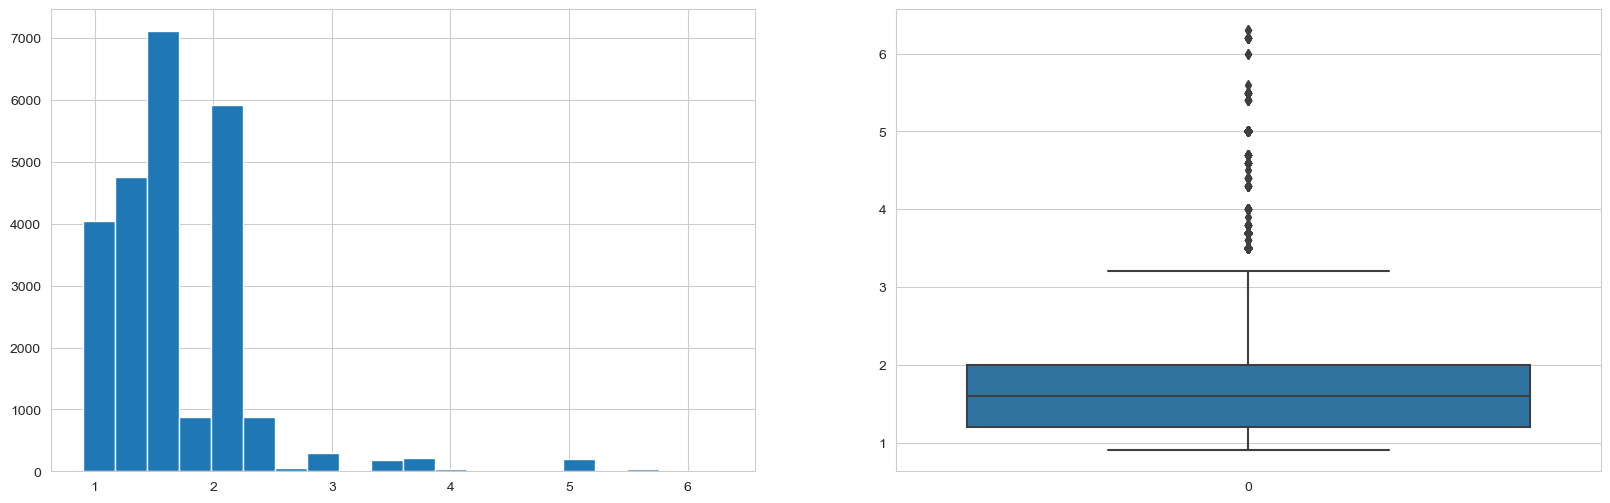

In [99]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=20)

plt.subplot(122)
sns.boxplot(df["engine_size"]) # boxplot based on 2.5 whisker

plt.show()

In [100]:
# As seen in the graph engine sizes above 4.0 cc can easily be considered as outlier
df = df.loc[df["engine_size"] <= 4]

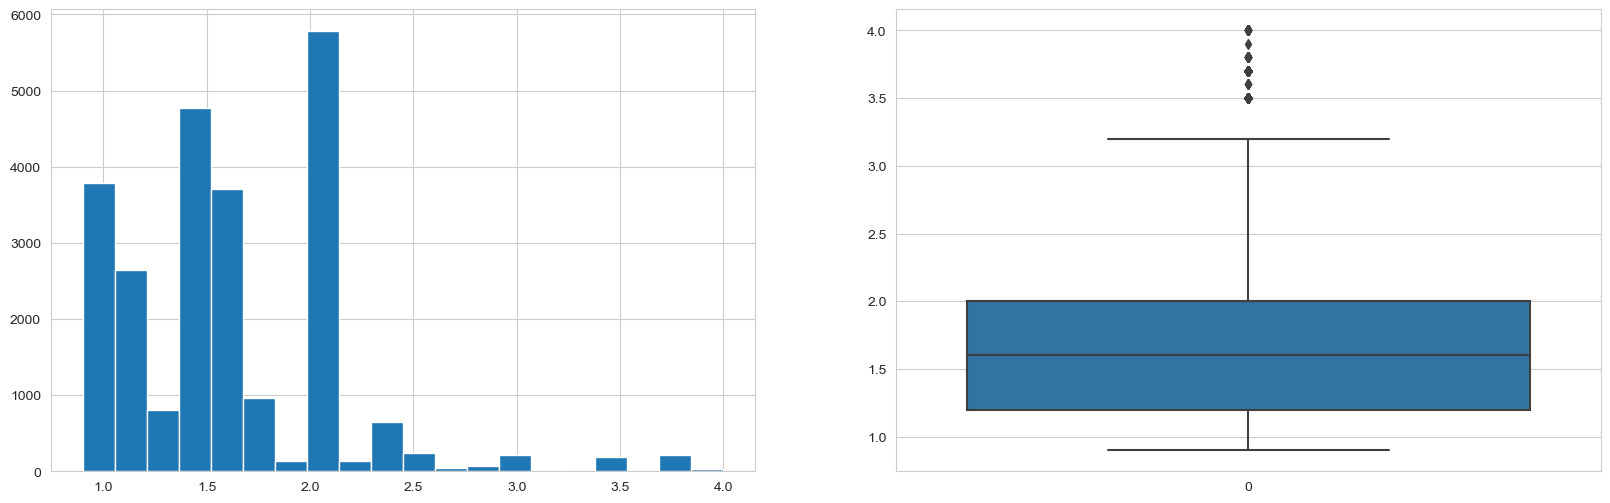

In [101]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["engine_size"], bins=20)

plt.subplot(122)
sns.boxplot(df["engine_size"]) # boxplot based on 2.5 whisker

plt.show()

<a id="8"></a>
<div class="alert alert-info" role="alert">
<h1>Power<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [102]:
first_looking("power")

column name    :  power
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  297
150.00    1950
131.00    1283
110.00    1163
120.00    1161
90.00     1068
          ... 
11.00        1
294.00       1
398.00       1
16.00        1
226.45       1
Name: power, Length: 297, dtype: int64


In [103]:
df.rename(columns = {"power" : "power_kwh"}, inplace=True)

In [104]:
df.power_kwh

0        99.33
2       306.00
3       136.00
4       122.00
5       190.00
         ...  
28199   392.00
28200   170.00
28201   114.00
28202   254.00
28203   200.00
Name: power_kwh, Length: 24388, dtype: float64

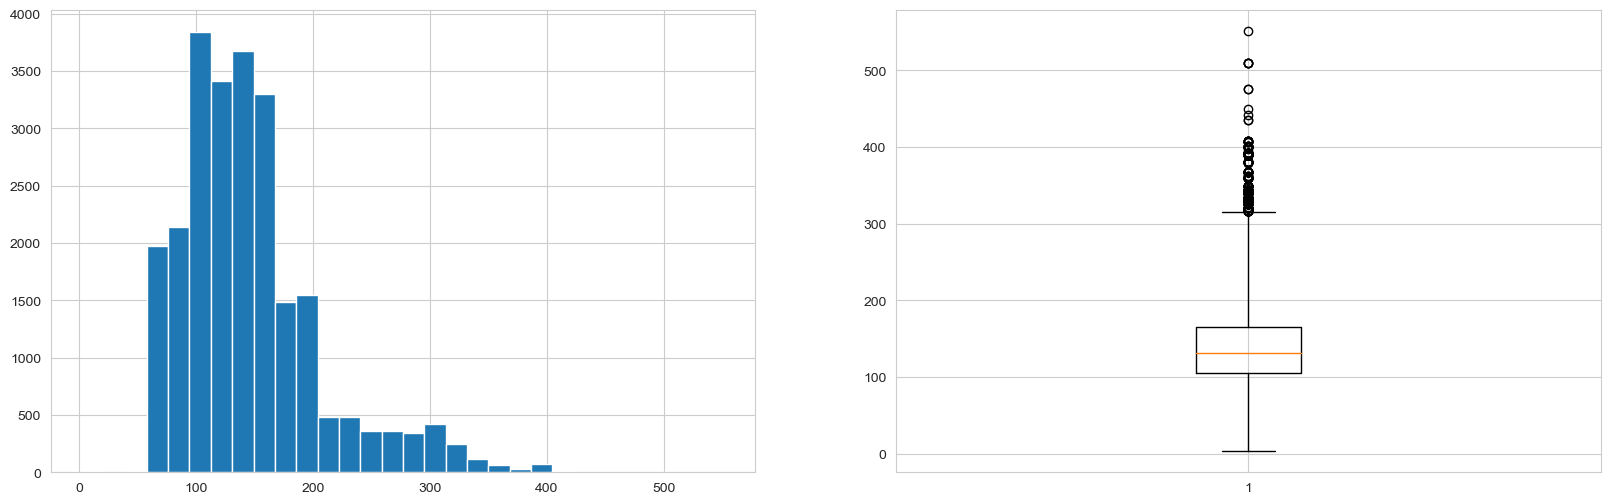

In [105]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["power_kwh"], bins=30)

plt.subplot(122)
plt.boxplot(df["power_kwh"], whis=2.5)  

plt.show()

In [106]:
df.sort_values(by=["power_kwh"], ascending=False)["power_kwh"].head(20)


19104   551.00
1998    510.00
1634    510.00
1611    510.00
2098    510.00
1810    476.00
1990    476.00
1273    449.00
2120    442.00
1560    435.00
1564    435.00
27989   408.00
27348   408.00
26519   408.00
3070    408.00
26896   408.00
27730   408.00
28033   407.00
26698   407.00
26316   407.00
Name: power_kwh, dtype: float64

In [107]:
df["power_kwh"].sort_values(ascending=True).head(20)

5010     3.00
7274     4.00
7279     4.00
21761    4.00
24041    8.00
5403    10.00
5806    11.00
5691    16.00
9351    23.00
10095   33.00
5003    42.00
7172    54.00
16452   54.00
11004   54.00
9427    54.00
11007   54.00
9489    54.00
4999    58.00
5007    58.00
2526    58.00
Name: power_kwh, dtype: float64

In [108]:
df.loc[df.sort_values(by=["power_kwh"], ascending=False)["power_kwh"].head(20).index][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]]


make_model   age         body_type drivetrain  engine_size  \
19104             Nissan 350Z 18.00             Coupe       Rear         3.50   
1998   Mercedes-Benz C 63 AMG  6.00             Sedan       Rear         4.00   
1634   Mercedes-Benz C 63 AMG  6.00     Station wagon        4WD         4.00   
1611   Mercedes-Benz C 63 AMG  5.00     Station wagon       Rear         4.00   
2098   Mercedes-Benz C 63 AMG  6.00             Sedan       Rear         4.00   
1810   Mercedes-Benz C 63 AMG  7.00     Station wagon        4WD         4.00   
1990   Mercedes-Benz C 63 AMG  7.00             Sedan       Rear         4.00   
1273    Mercedes-Benz GLE 500  6.00  Off-Road/Pick-up        4WD         3.00   
2120      Mercedes-Benz S 500  5.00             Sedan       Rear         3.00   
1560   Mercedes-Benz E 53 AMG  3.00     Station wagon        4WD         3.00   
1564   Mercedes-Benz E 53 AMG  3.00     Station wagon        4WD         3.00   
27989               Volvo S90  3.00             Sedan        4WD         2.00   
27348               Volvo V90  3.00     Station wagon        4WD         2.00   
26519              Volvo XC90  5.00  Off-Road/Pick-up        4WD         2.00   
3070               Opel Astra 15.00             Coupe      Front         2.00   
26896              Volvo XC90  5.00  Off-Road/Pick-up        4WD         2.00   
27730               Volvo V90  3.00     Station wagon        4WD         2.00   
28033               Volvo S90  5.00             Sedan        4WD         2.00   
26698              Volvo XC60  4.00  Off-Road/Pick-up        4WD         2.00   
26316              Volvo XC60  4.00  Off-Road/Pick-up        4WD         2.00   

      fuel_type  power_kwh  
19104   Benzine     551.00  
1998    Benzine     510.00  
1634    Benzine     510.00  
1611    Benzine     510.00  
2098    Benzine     510.00  
1810    Benzine     476.00  
1990    Benzine     476.00  
1273    Benzine     449.00  
2120    Benzine     442.00  
1560     Hybrid     435.00  
1564    Benzine     435.00  
27989   Benzine     408.00  
27348   Benzine     408.00  
26519    Hybrid     408.00  
3070    Benzine     408.00  
26896    Hybrid     408.00  
27730   Benzine     408.00  
28033    Diesel     407.00  
26698    Diesel     407.00  
26316    Diesel     407.00

In [109]:
#df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Nissan 350Z"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Mercedes-Benz C 63 AMG"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Opel Astra"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Volvo S90"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Volvo XC60"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])

In [110]:
df.loc[df.sort_values(by=["power_kwh"], ascending=True)["power_kwh"].head(20).index][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]]


make_model   age         body_type drivetrain  engine_size  \
5010   Renault Twingo  1.00           Compact      Front         1.10   
7274      Peugeot 108  1.00           Compact      Front         1.00   
7279      Peugeot 108  0.00           Compact      Front         1.00   
21761       Ford Kuga  1.00  Off-Road/Pick-up        4WD         1.50   
24041     Hyundai i20  3.00     Station wagon      Front         1.00   
5403   Renault Megane 16.00       Convertible      Front         1.60   
5806   Renault Megane 15.00             Coupe      Front         2.00   
5691   Renault Megane  9.00             Coupe      Front         1.90   
9351         Fiat 500 11.00           Compact      Front         1.10   
10095        Fiat 500  0.00       Convertible      Front         1.00   
5003   Renault Twingo  0.00           Compact      Front         1.00   
7172      Peugeot 107 12.00           Compact      Front         1.40   
16452     Toyota Aygo 13.00           Compact      Front         1.40   
11004      Fiat Panda 12.00     Station wagon      Front         1.10   
9427       Fiat Panda 16.00           Compact      Front         1.10   
11007      Fiat Panda 15.00     Station wagon      Front         1.10   
9489    Fiat Seicento 19.00           Compact      Front         1.10   
4999   Renault Twingo 12.00           Compact      Front         1.10   
5007   Renault Twingo 19.00           Compact      Front         1.10   
2526       Opel Agila 19.00           Compact      Front         1.00   

      fuel_type  power_kwh  
5010   Electric       3.00  
7274    Benzine       4.00  
7279    Benzine       4.00  
21761    Diesel       4.00  
24041   Benzine       8.00  
5403    Benzine      10.00  
5806     Diesel      11.00  
5691    Benzine      16.00  
9351    Benzine      23.00  
10095  Electric      33.00  
5003    Benzine      42.00  
7172     Diesel      54.00  
16452    Diesel      54.00  
11004   Benzine      54.00  
9427    Benzine      54.00  
11007   Benzine      54.00  
9489    Benzine      54.00  
4999    Benzine      58.00  
5007    Benzine      58.00  
2526    Benzine      58.00

In [111]:
#df.loc[df.make_model == "Renault Twingo"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Fiat 500"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Toyota Aygo"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Renault Megane"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Hyundai i20"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])
#df.loc[df.make_model == "Peugeot 107"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh"]].style.apply(highlight, subset=["power_kwh"])

In [112]:
# 1 kwh = 	1.34102209 hp*h
# horsepower of a car stays commonly between 100-300 depends on the class
# so kwh stays between 74 - 250 

In [113]:
df.loc[(df["power_kwh"] < 65) | (df["power_kwh"] > 300)]["power_kwh"]

2       306.00
6       306.00
9       381.00
14      306.00
16      381.00
         ...  
28063   390.00
28192   392.00
28193   310.00
28194   310.00
28199   392.00
Name: power_kwh, Length: 906, dtype: float64

In [114]:
# 70 kwh and 300 kwh have been decided as barriers
df.loc[(df["power_kwh"] < 65) | (df["power_kwh"] > 300), "power_kwh"] = np.nan

In [115]:
df.power_kwh.isnull().sum()

906

In [116]:
df.power_kwh.fillna(df.groupby(["make_model", "age", "body_type","engine_size", \
                                "fuel_type"])["power_kwh"].transform(lambda x: x.median()), inplace = True)


In [117]:
df.power_kwh.isnull().sum()

601

In [118]:
df.power_kwh.fillna(df.groupby(["make_model", "body_type","engine_size", "fuel_type"])["power_kwh"].transform(lambda x: x.median()), inplace = True)

In [119]:
df.power_kwh.isnull().sum()

450

In [120]:
df.power_kwh.fillna(df.groupby(["make_model","engine_class", \
                                "fuel_type"])["power_kwh"].transform(lambda x: x.median()), inplace = True)


In [121]:
df.power_kwh.isnull().sum()

370

In [122]:
df.power_kwh.fillna(df.groupby(["make_model"])["power_kwh"].transform(lambda x: x.median()), inplace = True)


In [123]:
df.power_kwh.isnull().sum()

302

In [124]:
pd.set_option('display.max.rows', None)

In [125]:
# since no consistent data exist to predict remaining missing values it has been decided to drop
df.dropna(subset = "power_kwh", inplace = True)

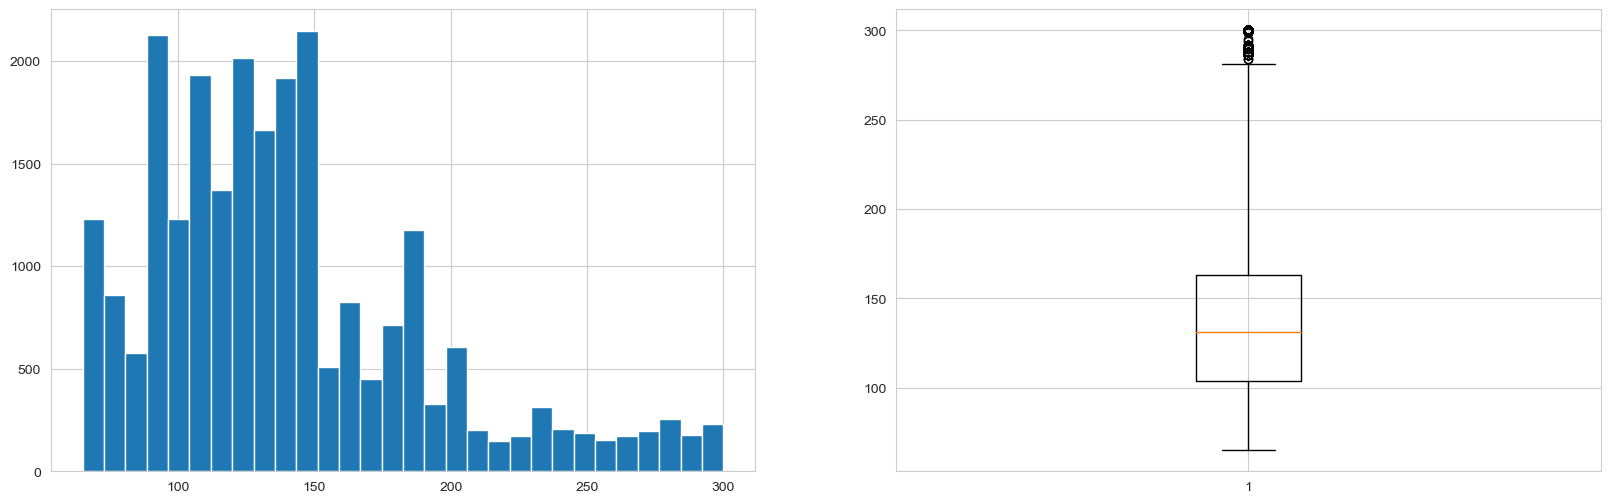

In [126]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["power_kwh"], bins=30)

plt.subplot(122)
plt.boxplot(df["power_kwh"], whis=2.0)  

plt.show()

<a id="9"></a>
<div class="alert alert-info" role="alert">
<h1>Gears<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [127]:
first_looking("gears")

column name    :  gears
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  10
6.00     11982
5.00      6603
7.00      2259
8.00      1890
1.00       724
9.00       515
4.00        75
0.00        21
10.00       16
2.00         1
Name: gears, dtype: int64


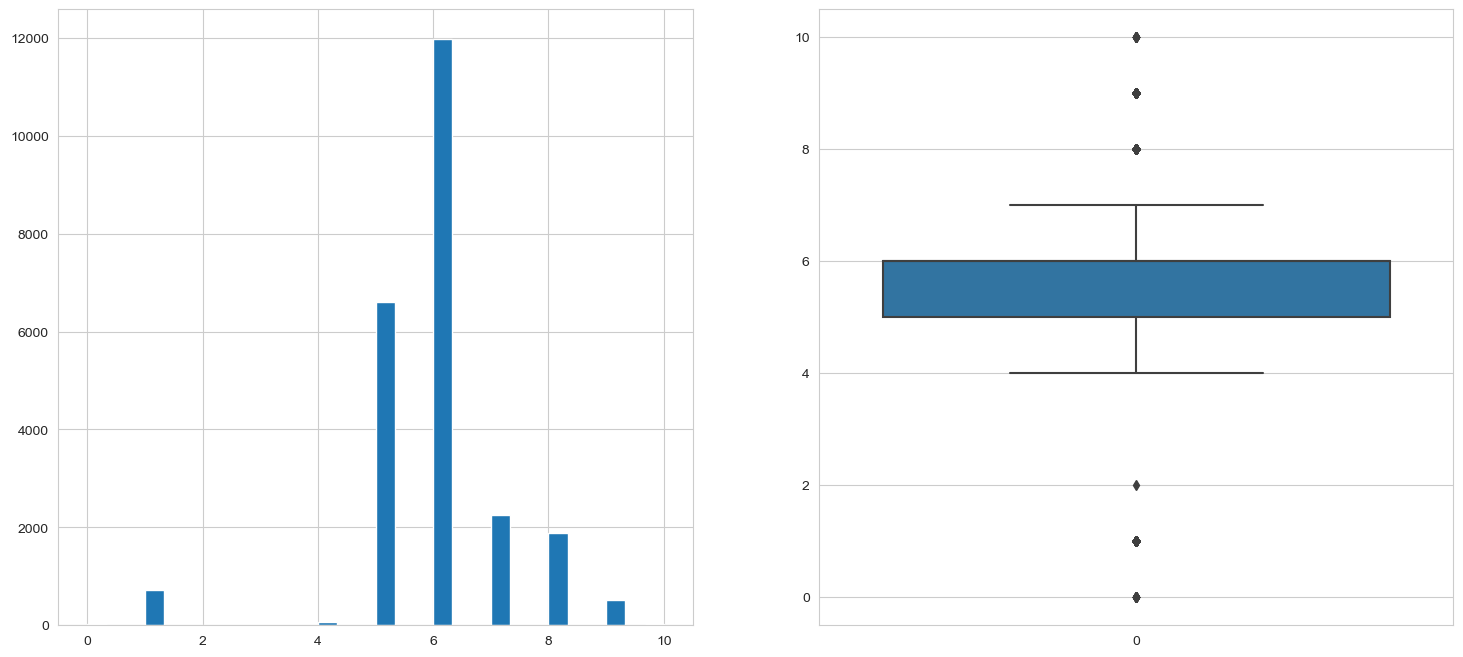

In [128]:
plt.figure(figsize=(18, 8))

plt.subplot(121)
plt.hist(df["gears"], bins=30)

plt.subplot(122)
sns.boxplot(df["gears"]) 

plt.show()

In [129]:
df.gears.sort_values(ascending=False).head(20)


21483   10.00
21265   10.00
20845   10.00
21603   10.00
21449   10.00
21439   10.00
21755   10.00
21905   10.00
20887   10.00
20896   10.00
20917   10.00
21079   10.00
21100   10.00
21417   10.00
21189   10.00
21595   10.00
1883     9.00
1024     9.00
1038     9.00
1036     9.00
Name: gears, dtype: float64

In [130]:
df.gears.sort_values(ascending=True).head(20)


14917   0.00
20257   0.00
18410   0.00
18407   0.00
18400   0.00
6063    0.00
18362   0.00
18353   0.00
18340   0.00
23565   0.00
21962   0.00
17692   0.00
17707   0.00
17912   0.00
17883   0.00
17862   0.00
28130   0.00
28131   0.00
9608    0.00
1147    0.00
Name: gears, dtype: float64

In [131]:
df.loc[df.gears.sort_values(ascending=False).head(20).index][["make_model", "body_type","engine_size", "fuel_type", "gears"]]


make_model         body_type  engine_size fuel_type  gears
21483           Ford Mustang             Coupe         2.30   Benzine  10.00
21265           Ford Mustang             Coupe         2.30   Benzine  10.00
20845           Ford Mustang       Convertible         2.30   Benzine  10.00
21603           Ford Mustang             Coupe         2.30   Benzine  10.00
21449           Ford Mustang             Coupe         2.30   Benzine  10.00
21439           Ford Mustang             Coupe         2.30   Benzine  10.00
21755            Ford Ranger  Off-Road/Pick-up         2.00    Diesel  10.00
21905            Ford Ranger  Off-Road/Pick-up         2.00    Diesel  10.00
20887           Ford Mustang       Convertible         2.30   Benzine  10.00
20896           Ford Mustang       Convertible         2.30   Benzine  10.00
20917           Ford Mustang       Convertible         2.30   Benzine  10.00
21079           Ford Mustang       Convertible         2.30   Benzine  10.00
21100           Ford Mustang       Convertible         2.30   Benzine  10.00
21417           Ford Mustang             Coupe         2.30   Benzine  10.00
21189           Ford Mustang       Convertible         2.30   Benzine  10.00
21595           Ford Mustang             Coupe         2.30   Benzine  10.00
1883     Mercedes-Benz C 220     Station wagon         2.00    Diesel   9.00
1024   Mercedes-Benz CLS 350             Coupe         2.90    Diesel   9.00
1038     Mercedes-Benz C 200             Coupe         1.50   Benzine   9.00
1036     Mercedes-Benz E 200             Coupe         2.00   Benzine   9.00

In [132]:
# df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh", "gears"]].style.apply(highlight, subset=["gears"])
# df.loc[df.make_model == "Mercedes-Benz E 200"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh", "gears"]].style.apply(highlight, subset=["gears"])
df.loc[df.make_model == "Ford Ranger"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh", "gears"]].style.apply(highlight, subset=["gears"])
# df.loc[df.make_model == "Ford Mustang"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "power_kwh", "gears"]].style.apply(highlight, subset=["gears"])


In [133]:
df[(df.gears < 5) | (df.gears > 8)][["make_model", "body_type", "gearbox", "fuel_type", "gears"]]

make_model         body_type         gearbox fuel_type  \
7        Mercedes-Benz A 200           Compact       Automatic    Diesel   
65       Mercedes-Benz B 200           Compact       Automatic    Diesel   
69       Mercedes-Benz V 220           Compact          Manual    Diesel   
87       Mercedes-Benz A 180           Compact       Automatic    Diesel   
158         Mercedes-Benz CL           Compact       Automatic   Benzine   
159         Mercedes-Benz CL           Compact       Automatic   Benzine   
160         Mercedes-Benz CL           Compact       Automatic   Benzine   
188         Mercedes-Benz CL           Compact       Automatic   Benzine   
193         Mercedes-Benz CL           Compact       Automatic    Diesel   
197         Mercedes-Benz CL           Compact       Automatic   Benzine   
204         Mercedes-Benz CL           Compact       Automatic   Benzine   
218         Mercedes-Benz CL           Compact       Automatic    Diesel   
221         Mercedes-Benz CL           Compact       Automatic   Benzine   
225         Mercedes-Benz CL           Compact       Automatic   Benzine   
227         Mercedes-Benz CL           Compact       Automatic    Diesel   
228         Mercedes-Benz CL           Compact       Automatic    Diesel   
231         Mercedes-Benz CL           Compact       Automatic    Diesel   
234         Mercedes-Benz CL           Compact       Automatic   Benzine   
236         Mercedes-Benz CL           Compact       Automatic    Diesel   
240         Mercedes-Benz CL           Compact          Manual    Diesel   
241         Mercedes-Benz CL           Compact       Automatic   Benzine   
242         Mercedes-Benz CL           Compact       Automatic   Benzine   
245         Mercedes-Benz CL           Compact       Automatic    Diesel   
248         Mercedes-Benz CL           Compact       Automatic   Benzine   
249         Mercedes-Benz CL           Compact       Automatic   Benzine   
255         Mercedes-Benz CL           Compact          Manual   Benzine   
256         Mercedes-Benz CL           Compact       Automatic   Benzine   
257         Mercedes-Benz CL           Compact       Automatic   Benzine   
258         Mercedes-Benz CL           Compact       Automatic   Benzine   
259         Mercedes-Benz CL           Compact       Automatic    Diesel   
272      Mercedes-Benz E 220           Compact       Automatic    Diesel   
337      Mercedes-Benz A 180           Compact       Automatic    Diesel   
388    Mercedes-Benz SLC 250       Convertible       Automatic    Diesel   
393    Mercedes-Benz CLK 200       Convertible       Automatic   Benzine   
394    Mercedes-Benz CLK 200       Convertible       Automatic       LPG   
419    Mercedes-Benz SLK 250       Convertible       Automatic    Diesel   
439      Mercedes-Benz C 300       Convertible       Automatic   Benzine   
448      Mercedes-Benz E 220       Convertible       Automatic    Diesel   
451      Mercedes-Benz E 300       Convertible       Automatic   Benzine   
455      Mercedes-Benz C 200       Convertible       Automatic   Benzine   
456    Mercedes-Benz SLC 200       Convertible       Automatic   Benzine   
459      Mercedes-Benz E 200       Convertible       Automatic   Benzine   
469      Mercedes-Benz E 200       Convertible       Automatic   Benzine   
470      Mercedes-Benz C 180       Convertible       Automatic   Benzine   
474      Mercedes-Benz C 250       Convertible       Automatic    Diesel   
475      Mercedes-Benz C 200       Convertible       Automatic   Benzine   
478      Mercedes-Benz C 220       Convertible       Automatic    Diesel   
483      Mercedes-Benz E 200       Convertible       Automatic   Benzine   
498      Mercedes-Benz C 200       Convertible       Automatic   Benzine   
502    Mercedes-Benz SLK 200       Convertible          Manual   Benzine   
511      Mercedes-Benz C 300       Convertible       Automatic   Benzine   
512      Mercedes-Benz C 180       Convertible       Automatic   B

In [134]:
# it has been identified that Ford Ranger and Ford Mustang has 6 gears.
df.loc[(df.make_model == "Ford Ranger") & ~(df["fuel_type"] == "Electric"), "gears"] = 6.0
df.loc[(df.make_model == "Ford Mustang") & ~(df["fuel_type"] == "Electric"), "gears"] = 6.0

In [135]:
df[((df["fuel_type"] != "Electric"))][["fuel_type", "gears", "make_model"]].value_counts()

fuel_type      gears  make_model             
Diesel         6.00   Volvo V40                  563
Benzine        5.00   Dacia Sandero              518
               6.00   Hyundai i30                489
                      Renault Megane             442
                      Opel Astra                 341
                      SEAT Leon                  328
               5.00   Nissan Micra               301
                      Volvo C70                  299
Diesel         6.00   Renault Megane             278
Benzine        6.00   Ford Focus                 271
                      Ford Fiesta                256
               5.00   Fiat 500                   255
Diesel         6.00   Peugeot 308                234
                      Nissan Qashqai             234
Benzine        5.00   SEAT Ibiza                 221
               6.00   Nissan Qashqai             221
               7.00   SEAT Leon                  205
               5.00   Opel Corsa                 196


In [136]:
df[((df["fuel_type"] == "Electric"))][["fuel_type", "gears", "make_model"]].value_counts()

fuel_type  gears  make_model           
Electric   5.00   Fiat 500                 12
           6.00   Hyundai IONIQ             9
           5.00   Peugeot 208               8
           1.00   Fiat 500C                 8
                  Hyundai KONA              8
                  Fiat 500                  8
                  Fiat 500e                 6
           8.00   Peugeot e-2008            6
           1.00   Renault Twingo            6
                  Renault ZOE               5
                  Toyota RAV 4              4
           6.00   Ford Kuga                 4
                  Hyundai TUCSON            4
           5.00   Peugeot 2008              3
           1.00   Renault Megane            3
           6.00   Peugeot e-208             3
           1.00   Peugeot 208               3
                  Hyundai IONIQ             3
           6.00   Hyundai KONA              2
                  Renault ZOE               2
           5.00   Fiat 500C             

In [137]:
df[df.gears == 0][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "fuel_type"]]

make_model  age         body_type         gearbox drivetrain  \
1147   Mercedes-Benz E 300 3.00             Coupe       Automatic       Rear   
6063        Renault Kadjar 2.00  Off-Road/Pick-up       Automatic      Front   
9608              Fiat 500 1.00           Compact       Automatic      Front   
12629         SEAT Tarraco 3.00  Off-Road/Pick-up       Automatic        4WD   
14917        Skoda Octavia 0.00             Sedan       Automatic      Front   
17692          Toyota C-HR 4.00  Off-Road/Pick-up       Automatic      Front   
17707          Toyota C-HR 1.00  Off-Road/Pick-up       Automatic      Front   
17862       Toyota Corolla 3.00     Station wagon       Automatic      Front   
17883       Toyota Corolla 1.00     Station wagon       Automatic      Front   
17912       Toyota Corolla 3.00     Station wagon       Automatic      Front   
18340         Toyota Yaris 3.00             Sedan       Automatic      Front   
18353         Toyota Yaris 3.00             Sedan       Automatic      Front   
18362         Toyota Yaris 4.00             Sedan       Automatic      Front   
18400         Toyota Yaris 3.00             Sedan       Automatic      Front   
18407         Toyota Yaris 4.00             Sedan       Automatic      Front   
18410         Toyota Yaris 4.00             Sedan       Automatic      Front   
20257         Nissan Micra 0.00             Sedan       Automatic      Front   
21962            Ford Kuga 0.00  Off-Road/Pick-up  Semi-automatic        4WD   
23565         Hyundai KONA 2.00  Off-Road/Pick-up       Automatic      Front   
28130            Volvo S90 5.00             Sedan       Automatic        4WD   
28131            Volvo S90 5.00             Sedan       Automatic        4WD   

       gears fuel_type  
1147    0.00    Diesel  
6063    0.00   Benzine  
9608    0.00   Benzine  
12629   0.00    Diesel  
14917   0.00   Benzine  
17692   0.00    Hybrid  
17707   0.00    Hybrid  
17862   0.00   Benzine  
17883   0.00    Hybrid  
17912   0.00    Hybrid  
18340   0.00    Hybrid  
18353   0.00    Hybrid  
18362   0.00    Hybrid  
18400   0.00    Hybrid  
18407   0.00    Hybrid  
18410   0.00    Hybrid  
20257   0.00   Benzine  
21962   0.00    Diesel  
23565   0.00  Electric  
28130   0.00    Diesel  
28131   0.00    Diesel

In [138]:
# it has been concluded that 0 and above 8 gears will be determined as missing. 
# Gear number is affected by fuel_type gear_type and make_model 
# most 0 gear cars is electric or hybrid which will be arranged according to model gear and fuel type.
df.loc[(df.gears == 0) | (df.gears > 8), "gears"] = np.nan

In [139]:
# missing values are filled according to "make_model", "fuel_type", "gearbox" groups
df.gears.fillna(df.groupby(["make_model", "fuel_type", "gearbox"])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [140]:
df.gears.isnull().sum()

440

In [141]:
df.gears.fillna(df.groupby(["make_model", "fuel_type"])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [142]:
df.gears.isnull().sum()

404

In [143]:
df.gears.fillna(df.groupby(["make_model", "body_type"])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [144]:
df.gears.isnull().sum()

379

In [145]:
df.gears.fillna(df.groupby(["make_model"])["gears"].transform(lambda x: stats.mode(x)[0][0]), inplace = True)

In [146]:
df.dropna(subset = "gears", inplace = True)

In [147]:
df.gears.isnull().sum()

0

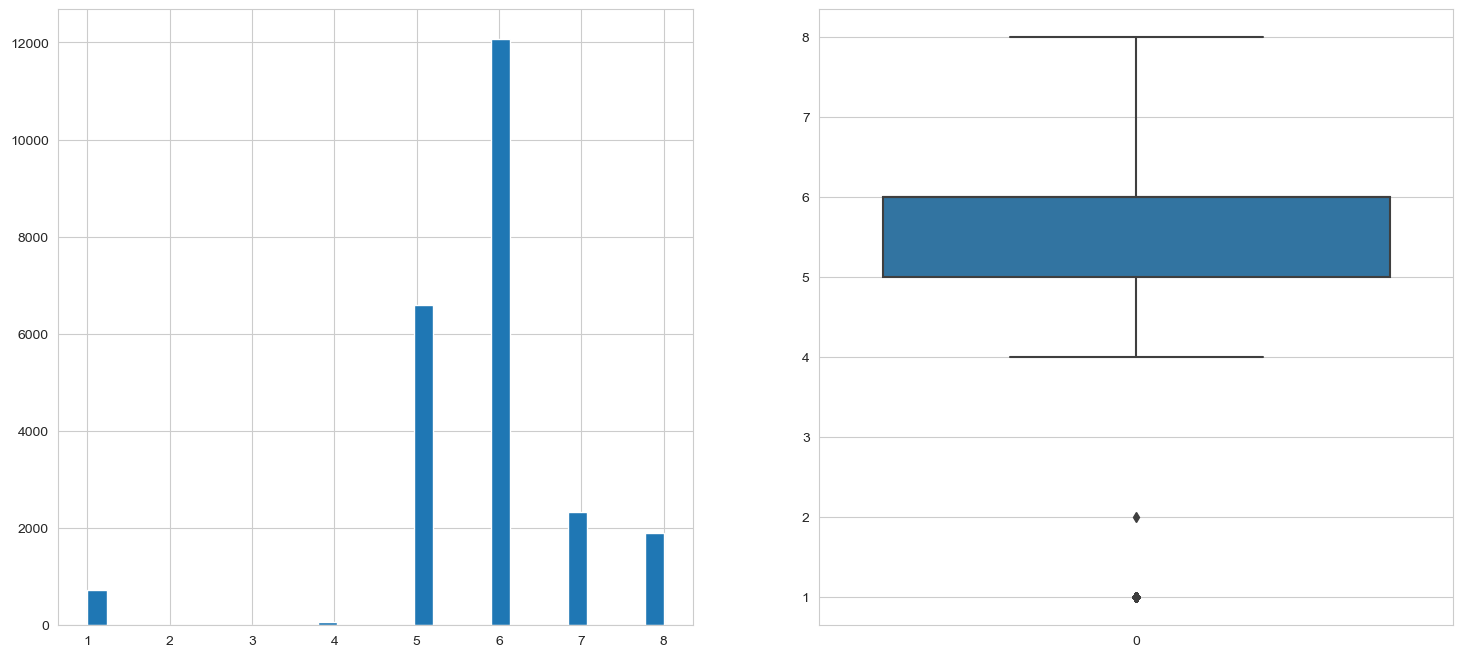

In [148]:
plt.figure(figsize=(18, 8))

plt.subplot(121)
plt.hist(df["gears"], bins=30)

plt.subplot(122)
sns.boxplot(df["gears"], whis = 2.5) 

plt.show()

In [149]:
# one value detected as outlier and dropped
df[df["gears"] == 2]

make_model  make    price body_type  type  doors warranty  mileage  \
9351   Fiat 500  Fiat 10950.00   Compact  Used   3.00       No 13500.00   

     gearbox fuel_type  ... safety_&_security        extras  empty_weight  \
9351  Manual   Benzine  ...   safety_standard  extras_basic        972.58   

      full_service_history   upholstery  previous_owner  location_country  \
9351                   Yes  fabric_hols            2.00           Germany   

     mile_class   age engine_class  
9351      0-50k 11.00        0-50k  

[1 rows x 31 columns]

In [150]:
df.drop(df[df["gears"] == 2].index, inplace = True)

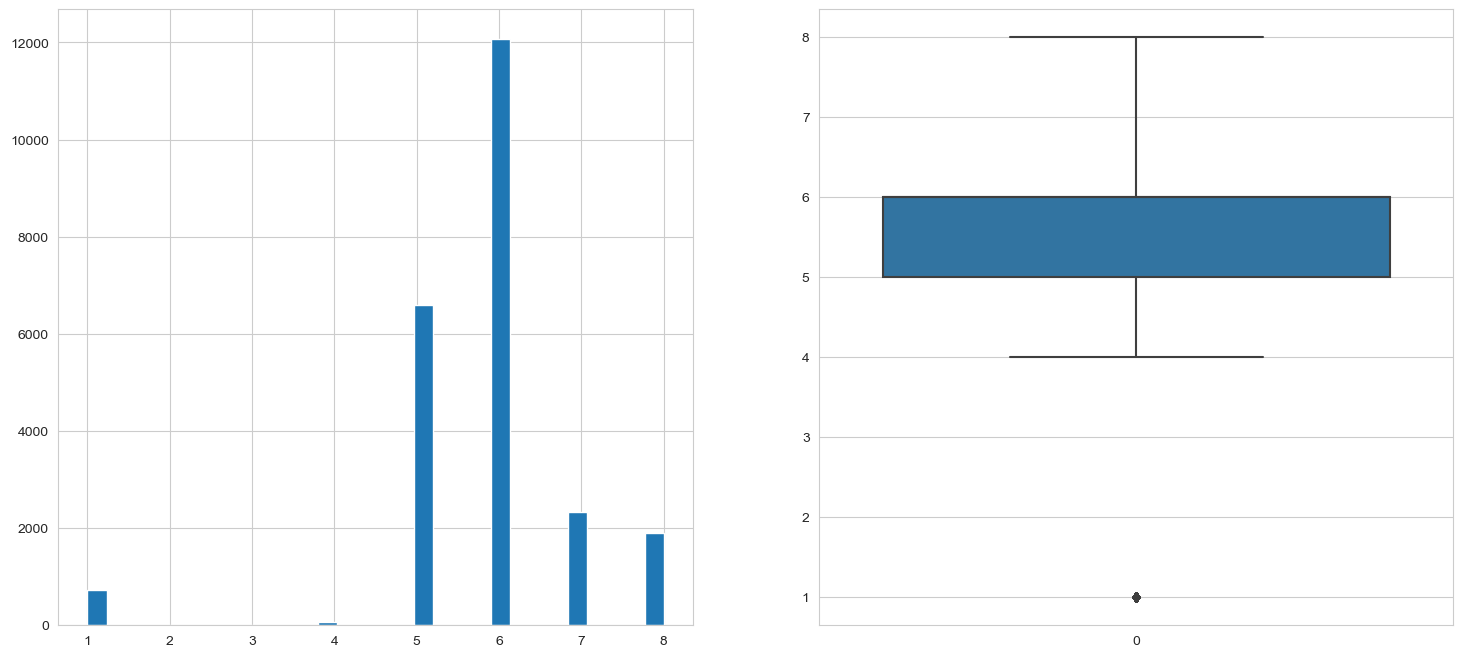

In [151]:
plt.figure(figsize=(18, 8))

plt.subplot(121)
plt.hist(df["gears"], bins=30)

plt.subplot(122)
sns.boxplot(df["gears"], whis = 2.5) 

plt.show()

<a id="10"></a>
<div class="alert alert-info" role="alert">
<h1>Empty Weight<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

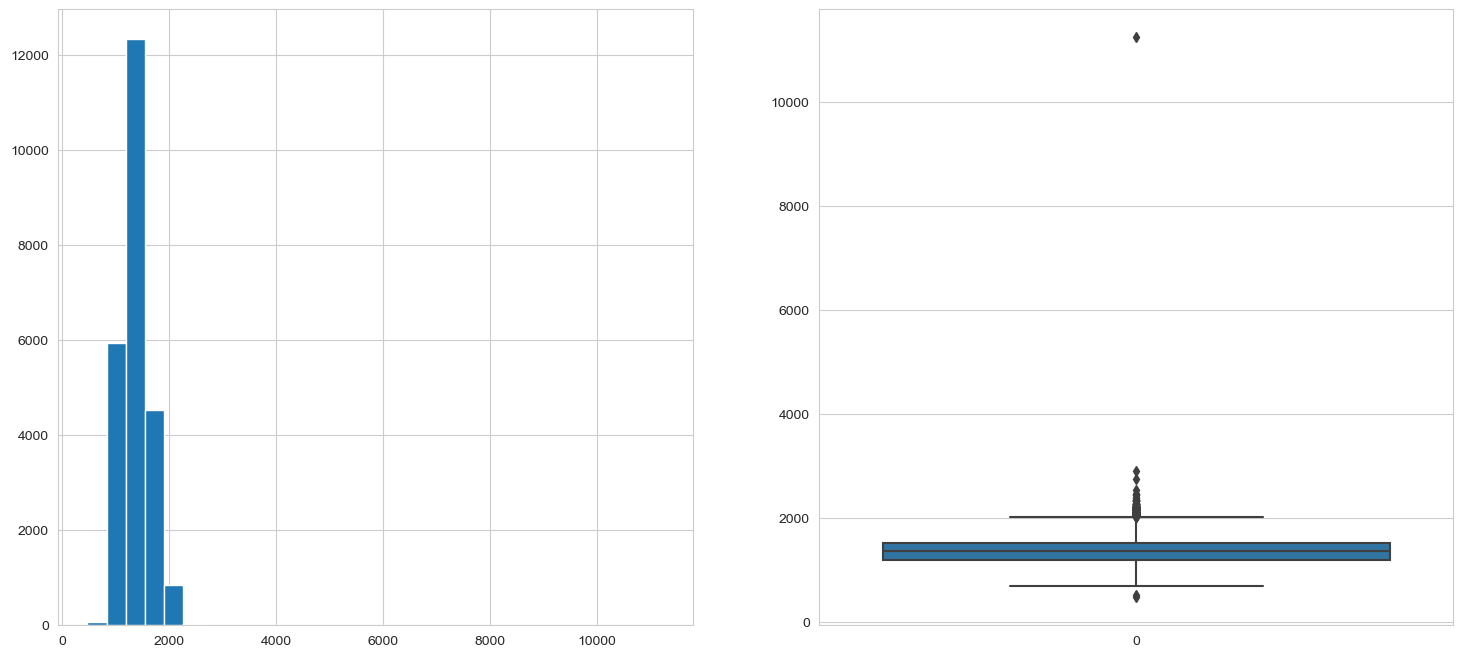

In [152]:
plt.figure(figsize=(18, 8))

plt.subplot(121)
plt.hist(df["empty_weight"], bins=30)

plt.subplot(122)
sns.boxplot(df["empty_weight"], whis = 1.5) 

plt.show()

In [153]:
first_looking("empty_weight")

column name    :  empty_weight
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  1408
1122.01     266
1055.00     225
1395.00     219
1423.00     214
1165.00     197
1307.37     184
1436.00     181
1280.00     175
1320.00     172
1365.68     149
1652.22     131
1090.00     125
1307.57     119
1388.09     112
1472.00     111
1988.64     108
1701.00     107
1357.22     106
1350.00     106
1315.00     106
1615.00     101
1327.70     101
1821.84     100
1106.67      98
1413.00      98
1340.31      98
1465.59      97
905.00       96
1310.00      93
1600.06      93
1370.00      92
1357.29      92
1485.00      90
1390.00      90
1295.00      88
1050.00      86
1275.00      85
1355.00      85
1430.00      85
1453.51      83
1425.00      82
1431.05      81
1150.14      81
1451.52      78
1135.00      76
1157.16      75
1684.53      75
1040.00      75
1266.55      74
1505.00      74
980.00       73
1181.29      72
1415.02      72
1072.71      71
1349.

In [154]:
df.sort_values(by=["empty_weight"], ascending=False)["empty_weight"].head(20)


20827   11246.00
19753    2900.00
5273     2750.00
1213     2545.00
1253     2455.00
1245     2455.00
1451     2450.00
23802    2443.00
22102    2381.00
23429    2379.00
26896    2350.00
26519    2350.00
26714    2349.00
26332    2349.00
1244     2335.00
21882    2326.00
21641    2326.00
21842    2326.00
22000    2318.00
22106    2288.00
Name: empty_weight, dtype: float64

In [155]:
df["empty_weight"].sort_values(ascending=True).head(20)

4805    473.00
4053    525.00
16944   695.00
11976   719.00
7125    765.00
7268    775.00
7315    775.00
7296    775.00
16815   775.00
7218    775.00
16730   780.00
16817   780.00
7362    780.00
7318    780.00
7294    780.00
16746   780.00
7304    780.00
7122    780.00
16452   790.00
18348   790.00
Name: empty_weight, dtype: float64

In [156]:
df.empty_weight

0        1291.00
3        1545.00
4        1465.00
5        1450.00
7        1365.00
8        1295.00
9        1555.00
10       1445.00
11       1330.00
12       1545.00
13       1358.89
15       1445.00
16       1555.00
17       1425.00
18       1455.00
19       1350.00
20       1404.90
22       1425.00
24       1291.00
25       1555.00
26       1404.90
27       1404.90
28       1358.89
29       1673.45
30       1395.00
31       1350.00
32       1445.00
33       1612.12
34       1358.89
35       1295.00
36       1358.89
37       1291.00
38       1358.89
39       1425.00
40       1450.00
41       1445.00
42       1445.00
43       1425.00
44       1425.00
45       1350.00
46       1445.00
47       1475.00
48       1358.89
49       1425.00
50       1455.00
51       1404.90
52       1445.00
53       1365.00
54       1402.50
55       1358.89
56       1555.00
57       1425.00
58       1358.89
59       1404.90
60       1475.00
61       1225.00
62       1475.00
63       1462.33
64       1485.

In [157]:
df.loc[df.empty_weight.sort_values(ascending=False).head(20).index][["make_model", "age", "body_type", "gearbox", "drivetrain", "gears", "engine_size", "fuel_type", "empty_weight"]]

make_model   age         body_type    gearbox drivetrain  \
20827           Ford Fiesta  1.00           Compact     Manual      Front   
19753          Nissan NV300  2.00     Station wagon     Manual      Front   
5273         Renault Megane 15.00       Convertible     Manual      Front   
1213   Mercedes-Benz GL 350 11.00  Off-Road/Pick-up  Automatic        4WD   
1253   Mercedes-Benz GL 350  9.00  Off-Road/Pick-up  Automatic        4WD   
1245   Mercedes-Benz GL 350  9.00  Off-Road/Pick-up  Automatic        4WD   
1451   Mercedes-Benz GL 320 13.00  Off-Road/Pick-up  Automatic        4WD   
23802        Hyundai STARIA  1.00     Station wagon  Automatic        4WD   
22102   Ford Tourneo Custom  3.00     Station wagon  Automatic      Front   
23429           Hyundai H-1  4.00  Off-Road/Pick-up  Automatic      Front   
26896            Volvo XC90  5.00  Off-Road/Pick-up  Automatic        4WD   
26519            Volvo XC90  5.00  Off-Road/Pick-up  Automatic        4WD   
26714            Volvo XC60  3.00  Off-Road/Pick-up  Automatic        4WD   
26332            Volvo XC60  3.00  Off-Road/Pick-up  Automatic        4WD   
1244   Mercedes-Benz ML 400 18.00  Off-Road/Pick-up  Automatic        4WD   
21882           Ford Ranger  3.00  Off-Road/Pick-up  Automatic        4WD   
21641           Ford Ranger  3.00  Off-Road/Pick-up  Automatic        4WD   
21842           Ford Ranger  3.00  Off-Road/Pick-up  Automatic        4WD   
22000   Ford Tourneo Custom  4.00     Station wagon     Manual      Front   
22106   Ford Tourneo Custom  1.00     Station wagon     Manual      Front   

       gears  engine_size fuel_type  empty_weight  
20827   6.00         1.00   Benzine      11246.00  
19753   6.00         2.00    Diesel       2900.00  
5273    5.00         1.60   Benzine       2750.00  
1213    7.00         3.00    Diesel       2545.00  
1253    7.00         3.00    Diesel       2455.00  
1245    7.00         3.00    Diesel       2455.00  
1451    7.00         3.00    Diesel       2450.00  
23802   8.00         2.20    Diesel       2443.00  
22102   6.00         2.00    Diesel       2381.00  
23429   5.00         2.50    Diesel       2379.00  
26896   8.00         2.00    Hybrid       2350.00  
26519   8.00         2.00    Hybrid       2350.00  
26714   8.00         2.00    Hybrid       2349.00  
26332   8.00         2.00    Hybrid       2349.00  
1244    5.00         4.00    Diesel       2335.00  
21882   6.00         3.20    Diesel       2326.00  
21641   6.00         3.20    Diesel       2326.00  
21842   6.00         3.20    Diesel       2326.00  
22000   6.00         2.00    Diesel       2318.00  
22106   6.00         2.00    Diesel       2288.00

In [158]:
# Ford Fiesta	11246.00 empty_weight is considered ass missing value
df.loc[20827, "empty_weight"] = np.nan

In [159]:
# it has been concluded that average empty weights of an automobiles stays between 1k and 3k kilograms depends on the body_type
# electric, hybtid or one seat cars may fall under 1k limit. 

In [160]:
df.shape

(23735, 31)

In [161]:
df.loc[df["empty_weight"] < 1000][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "empty_weight"]]

make_model   age      body_type drivetrain  engine_size  \
2373           Opel Karl  3.00        Compact      Front         1.00   
2400           Opel Karl  3.00        Compact      Front         1.00   
2408           Opel Karl  7.00        Compact      Front         1.00   
2413          Opel Corsa  1.00        Compact      Front         1.20   
2447           Opel Karl  3.00        Compact      Front         1.00   
2457           Opel Karl  3.00        Compact      Front         1.00   
2459           Opel Adam  9.00        Compact      Front         1.20   
2469           Opel Karl  3.00        Compact      Front         1.00   
2512           Opel Karl  7.00        Compact      Front         1.00   
2520           Opel Karl  4.00        Compact      Front         1.00   
2596           Opel Karl  6.00        Compact      Front         1.00   
2621          Opel Corsa 17.00        Compact      Front         1.20   
2638          Opel Corsa 20.00        Compact      Front         1.20   
2645          Opel Corsa 17.00        Compact      Front         1.20   
2649           Opel Karl  6.00        Compact      Front         1.00   
2934      Opel Speedster 17.00    Convertible      Front         2.00   
2964      Opel Speedster 17.00    Convertible      Front         2.00   
2969      Opel Speedster 18.00    Convertible       Rear         2.00   
2975      Opel Speedster 19.00    Convertible       Rear         2.20   
2977      Opel Speedster 18.00    Convertible      Front         2.20   
3022      Opel Speedster 17.00    Convertible      Front         2.20   
3258             Opel GT 13.00          Coupe       Rear         2.00   
3335      Opel Speedster 20.00          Coupe       Rear         2.20   
3424          Opel Corsa 20.00          Coupe      Front         1.40   
4053          Opel Astra  1.00  Station wagon      Front         1.20   
4467           Opel Karl  3.00          Sedan      Front         1.00   
4474           Opel Karl  3.00          Sedan      Front         1.00   
4514           Opel Karl  6.00          Sedan      Front         1.00   
4600           Opel Karl  3.00          Sedan      Front         1.00   
4601           Opel Karl  3.00          Sedan      Front         1.00   
4642           Opel Karl  4.00          Sedan      Front         1.00   
4665      Renault Twingo  6.00        Compact       Rear         1.00   
4669        Renault Clio  7.00        Compact      Front         0.90   
4706        Renault Clio 15.00        Compact      Front         1.10   
4728      Renault Twingo  7.00        Compact      Front         1.00   
4731      Renault Twingo  5.00        Compact       Rear         1.00   
4734        Renault Clio  8.00        Compact      Front         1.10   
4738      Renault Twingo 14.00        Compact      Front         1.10   
4740      Renault Twingo  1.00        Compact      Front         1.00   
4742      Renault Twingo  2.00        Compact      Front         1.00   
4745      Renault Twingo  1.00        Compact       Rear         1.00   
4749        Renault Clio 15.00        Compact      Front         1.10   
4750      Renault Twingo  1.00        Compact       Rear         1.00   
4756      Renault Twingo  4.00        Compact       Rear         1.00   
4760      Renault Twingo  5.00        Compact       Rear         1.00   
4763      Renault Twingo  2.00        Compact       Rear         1.00   
4767        Renault Clio 12.00        Compact      Front         1.10   
4770      Renault Twingo  1.00        Compact       Rear         1.00   
4771      Renault Twingo  1.00        Compact       Rear         1.00   
4772      Renault Twingo  0.00        Compact      Front         1.00   
4773      Renault Twingo  1.00        Compact       Rear         1.00   
4774      Renault Twingo  1.00        Compact       Rear         1.00   
4775      Renault Twingo  1.00        Compact       Rear         1.00   
4777      Renault Twingo 15.00        Compact      Front         1.10   

In [162]:
#df.loc[df["make_model"] == "Opel Corsa"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "empty_weight"]]
df.loc[df["make_model"] == "Renault Spider"][["make_model", "age", "body_type", "drivetrain", "engine_size", "fuel_type", "empty_weight"]]

Empty DataFrame
Columns: [make_model, age, body_type, drivetrain, engine_size, fuel_type, empty_weight]
Index: []

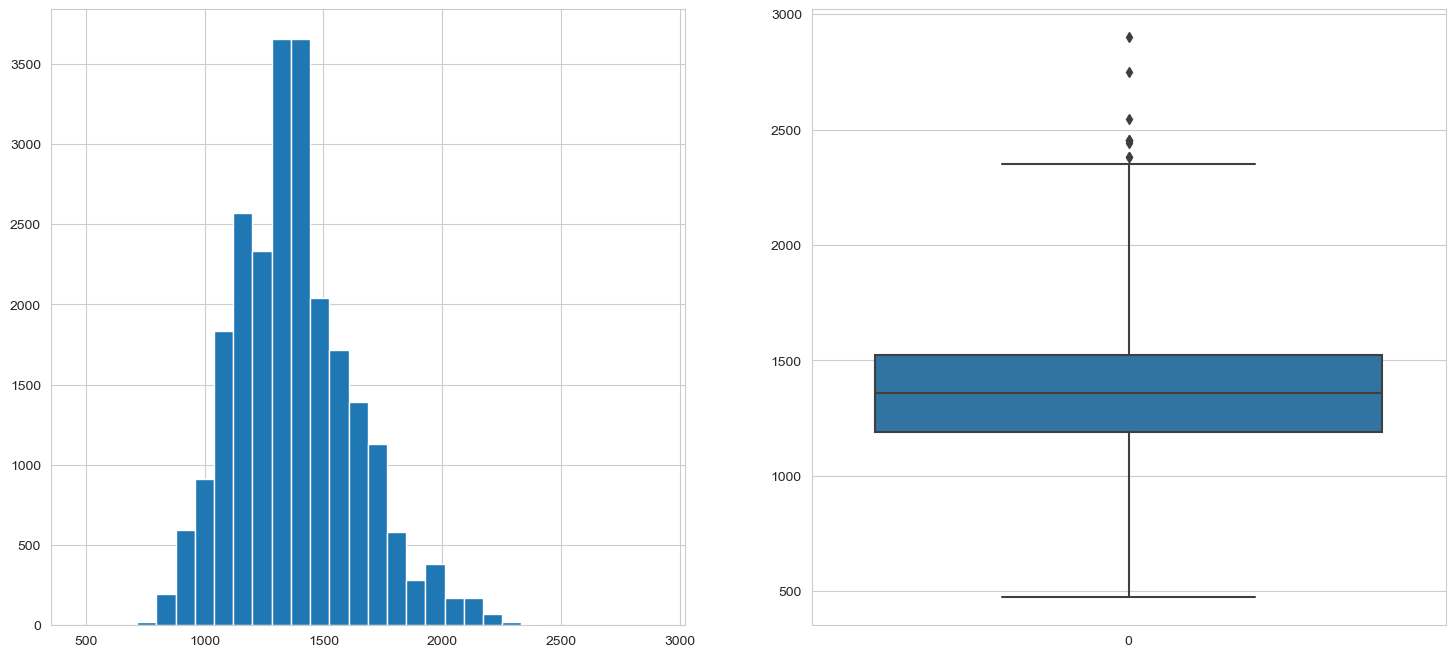

In [163]:
plt.figure(figsize=(18, 8))

plt.subplot(121)
plt.hist(df["empty_weight"], bins=30)

plt.subplot(122)
sns.boxplot(df["empty_weight"], whis = 2.5) 

plt.show()

In [164]:
df.empty_weight.isnull().sum()

1

In [165]:
df.empty_weight.fillna(df.groupby(["make_model"])["empty_weight"].transform(lambda x: x.median()), inplace = True )

In [166]:
df.empty_weight.isnull().sum()

0

<a id="11"></a>
<div class="alert alert-info" role="alert">
<h1>CO2 Emission<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [167]:
first_looking("co_emissions")

column name    :  co_emissions
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  299
0.00        853
130.00      648
120.00      626
94.00       615
117.00      612
108.00      581
119.00      579
109.00      549
115.00      533
139.00      465
124.00      431
113.00      428
99.00       422
129.00      389
114.00      358
110.00      348
112.00      347
104.00      308
123.00      304
125.00      291
127.00      282
103.00      274
118.00      263
126.00      262
111.00      260
122.00      251
149.00      250
106.00      250
138.00      233
107.00      231
128.00      222
95.00       221
134.00      218
102.00      212
144.00      204
169.00      199
140.00      199
145.00      197
135.00      195
116.00      194
121.00      192
155.00      189
105.00      187
92.00       187
85.00       187
98.00       186
159.00      181
148.00      181
131.00      175
93.00       173
88.00       171
273.00      168
154.00      164
101.00      162
133.00

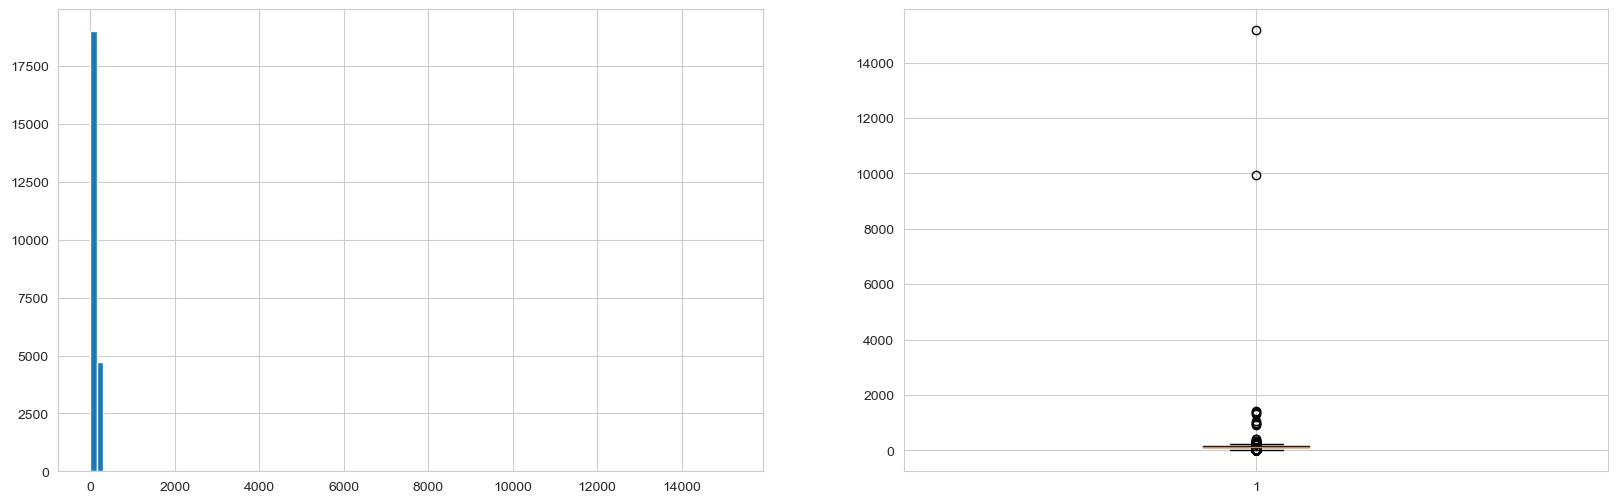

In [168]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["co_emissions"], bins=100)

plt.subplot(122)
plt.boxplot(df["co_emissions"], whis=2.5)

plt.show()

In [169]:
df.sort_values(by=["co_emissions"], ascending=False)["co_emissions"].head(20)


9739    15168.00
20573    9954.00
17804    1410.00
10014    1390.00
4422     1360.00
11630    1320.00
9114     1060.00
26125    1000.00
26297    1000.00
21673     940.00
20482     910.00
27085     414.00
27472     414.00
17637     336.00
21406     327.00
26351     306.00
26733     306.00
20939     299.00
19693     295.00
19793     295.00
Name: co_emissions, dtype: float64

In [170]:
df.sort_values(by=["co_emissions"], ascending=True)["co_emissions"].head(20)


12747   0.00
13048   0.00
13062   0.00
21781   0.00
13076   0.00
13082   0.00
3811    0.00
13116   0.00
3800    0.00
17848   0.00
3788    0.00
13197   0.00
13047   0.00
13201   0.00
21768   0.00
21756   0.00
13226   0.00
21750   0.00
13245   0.00
13256   0.00
Name: co_emissions, dtype: float64

In [171]:
df.loc[df.sort_values(by=["co_emissions"], ascending=False)["co_emissions"].head(20).index][["make_model", "age", "fuel_type", "co_emissions"]]

make_model   age fuel_type  co_emissions
9739       Fiat 124 Spider  4.00   Benzine      15168.00
20573           Ford Focus  2.00   Benzine       9954.00
17804       Toyota Avensis 11.00    Diesel       1410.00
10014             Fiat 500  5.00   Benzine       1390.00
4422            Opel Astra  3.00   Benzine       1360.00
11630            Fiat Tipo  6.00   Benzine       1320.00
9114           Peugeot 308  2.00    Diesel       1060.00
26125            Volvo C30 13.00   Benzine       1000.00
26297            Volvo C30 13.00   Benzine       1000.00
21673            Ford Edge  2.00    Diesel        940.00
20482          Ford Fiesta  1.00   Benzine        910.00
27085            Volvo V60  5.00    Diesel        414.00
27472            Volvo V60  5.00    Diesel        414.00
17637  Toyota Land Cruiser  6.00   Benzine        336.00
21406         Ford Mustang 16.00   Benzine        327.00
26351           Volvo XC90 16.00   Benzine        306.00
26733           Volvo XC90 16.00   Benzine        306.00
20939         Ford Mustang 15.00   Benzine        299.00
19693        Nissan Murano 16.00   Benzine        295.00
19793        Nissan Murano 13.00   Benzine        295.00

In [172]:
# Since there are emission standars for automobiles in EU depends on the production.
# below 100 g/km can be considered as low
# between 100 - 180 can be considered as Medium
# Above 180 can be considered as high 
# Fuel type and engine size and age are the main factors that affects co2 emissions

In [173]:
df.loc[df["co_emissions"] > 270][["make_model", "body_type", "fuel_type", "co_emissions"]]

make_model         body_type fuel_type  co_emissions
416    Mercedes-Benz SL 350       Convertible   Benzine        281.00
540    Mercedes-Benz SL 350       Convertible   Benzine        281.00
765    Mercedes-Benz SL 350       Convertible   Benzine        277.00
3900          Opel Insignia     Station wagon   Benzine        274.00
4422             Opel Astra             Sedan   Benzine       1360.00
6323         Renault Espace     Station wagon   Benzine        292.00
9114            Peugeot 308             Sedan    Diesel       1060.00
9739        Fiat 124 Spider       Convertible   Benzine      15168.00
10014              Fiat 500       Convertible   Benzine       1390.00
11630             Fiat Tipo             Sedan   Benzine       1320.00
17637   Toyota Land Cruiser  Off-Road/Pick-up   Benzine        336.00
17804        Toyota Avensis     Station wagon    Diesel       1410.00
18813           Nissan 350Z       Convertible   Benzine        273.00
18816           Nissan 350Z       Convertible   Benzine        273.00
18825           Nissan 350Z       Convertible   Benzine        273.00
18826           Nissan 350Z       Convertible   Benzine        273.00
18827           Nissan 350Z       Convertible   Benzine        288.00
18829           Nissan 350Z       Convertible   Benzine        273.00
18831           Nissan 350Z       Convertible   Benzine        288.00
18832           Nissan 350Z       Convertible   Benzine        288.00
18836           Nissan 350Z       Convertible   Benzine        288.00
18838           Nissan 350Z       Convertible   Benzine        273.00
18840           Nissan 350Z       Convertible   Benzine        273.00
18842           Nissan 350Z       Convertible   Benzine        273.00
18850           Nissan 350Z       Convertible   Benzine        288.00
18851           Nissan 350Z       Convertible   Benzine        273.00
18853           Nissan 350Z       Convertible   Benzine        280.00
18854           Nissan 350Z       Convertible   Benzine        273.00
18855           Nissan 350Z       Convertible   Benzine        273.00
18856           Nissan 350Z       Convertible   Benzine        273.00
18857           Nissan 350Z       Convertible   Benzine        273.00
18858           Nissan 350Z       Convertible   Benzine        288.00
18859           Nissan 350Z       Convertible   Benzine        273.00
18862           Nissan 350Z       Convertible   Benzine        273.00
18865           Nissan 350Z       Convertible   Benzine        280.00
18866           Nissan 350Z       Convertible   Benzine        273.00
18867           Nissan 350Z       Convertible   Benzine        288.00
18868           Nissan 350Z       Convertible   Benzine        288.00
18870           Nissan 350Z       Convertible   Benzine        288.00
18871           Nissan 350Z       Convertible   Benzine        273.00
18872           Nissan 350Z       Convertible   Benzine        273.00
18875           Nissan 350Z       Convertible   Benzine        288.00
18878           Nissan 350Z       Convertible   Benzine        273.00
18879           Nissan 350Z       Convertible   Benzine        273.00
18882           Nissan 350Z       Convertible   Benzine        273.00
18885           Nissan 350Z       Convertible   Benzine        273.00
18886           Nissan 350Z       Convertible   Benzine        273.00
18888           Nissan 350Z       Convertible   Benzine        273.00
18891           Nissan 350Z       Convertible   Benzine        273.00
18894           Nissan 350Z       Convertible   Benzine        273.00
18895           Nissan 350Z       Convertible   Benzine        288.00
18897           Nissan 350Z       Convertible   Benzine        273.00
18899           Nissan 350Z       Convertible   Benzine        273.00
18900           Nissan 350Z       Convertible   Benzine        288.00
18903           Nissan 350Z       Convertible   Benzine        273.00
18904           Nissan 350Z       Convertible   Benzine        288.00
18905           Nissan 350Z

In [174]:
# df.loc[df.make_model == "Opel Astra"][["make_model", "body_type", "fuel_type", "co_emissions"]]
# df.loc[df.make_model == "Toyota Avensis"][["make_model", "body_type", "fuel_type", "co_emissions"]]
# df.loc[df.make_model == "Ford Focus"][["make_model", "body_type", "fuel_type", "co_emissions"]]
#df.loc[df.make_model == "Volvo V60"][["make_model", "body_type", "fuel_type", "co_emissions"]]
#df.loc[df.make_model == "Toyota Land Cruiser"][["make_model", "body_type", "fuel_type", "co_emissions"]]
#df.loc[df.make_model == "Ford Fiesta"][["make_model", "body_type", "fuel_type", "co_emissions"]]
#df.loc[df.make_model == "Toyota Avensis"][["make_model", "body_type", "fuel_type", "co_emissions"]]



In [175]:
df.loc[df["co_emissions"] >= 300, "co_emissions" ] = np.nan

In [176]:
df.empty

False

In [177]:
df.co_emissions.isnull().sum()

17

In [178]:
df.co_emissions.fillna(df.groupby(["make_model", "fuel_type"])["co_emissions"].transform(lambda x: x.median()), inplace = True )

In [179]:
df.co_emissions.isnull().sum()

1

In [180]:
df.loc[df["co_emissions"] <= 50 ][["make_model", "body_type", "fuel_type", "co_emissions"]]

make_model         body_type fuel_type  co_emissions
54         Mercedes-Benz A 250           Compact   Benzine          0.00
97      Mercedes-Benz A 45 AMG           Compact   Benzine          0.00
128        Mercedes-Benz A 200           Compact    Diesel          0.00
143        Mercedes-Benz A 200           Compact    Diesel          0.00
146        Mercedes-Benz A 200           Compact   Benzine          0.00
154        Mercedes-Benz A 250           Compact   Benzine          0.00
173        Mercedes-Benz A 180           Compact    Diesel          0.00
190        Mercedes-Benz A 200           Compact   Benzine          0.00
195        Mercedes-Benz A 180           Compact   Benzine          0.00
220        Mercedes-Benz B 180           Compact    Diesel          1.00
230        Mercedes-Benz A 200           Compact   Benzine          0.00
624      Mercedes-Benz SLK 200       Convertible   Benzine          0.00
750      Mercedes-Benz SLK 250       Convertible   Benzine          0.00
754       Mercedes-Benz SL 350       Convertible   Benzine          0.00
763      Mercedes-Benz SLK 230       Convertible   Benzine          0.00
874      Mercedes-Benz CLA 250             Coupe   Benzine         24.00
901      Mercedes-Benz CLA 250             Coupe   Benzine         31.00
1098     Mercedes-Benz CLA 250             Coupe   Benzine         23.00
1130     Mercedes-Benz CLA 250             Coupe   Benzine          0.00
1363     Mercedes-Benz GLA 220  Off-Road/Pick-up    Diesel          0.00
1413     Mercedes-Benz GLB 200  Off-Road/Pick-up    Diesel          0.00
1497     Mercedes-Benz GLA 220  Off-Road/Pick-up    Diesel          0.00
1542       Mercedes-Benz C 350     Station wagon   Benzine         49.00
1684       Mercedes-Benz C 200     Station wagon   Benzine          0.00
1741       Mercedes-Benz C 350     Station wagon   Benzine         49.00
1832     Mercedes-Benz CLA 180     Station wagon   Benzine          0.00
1897     Mercedes-Benz CLA 250     Station wagon   Benzine         33.00
1910     Mercedes-Benz GLA 200     Station wagon   Benzine          0.00
2138       Mercedes-Benz A 250             Sedan   Benzine         22.00
2214       Mercedes-Benz B 220             Sedan    Diesel          0.00
2287                 Opel Adam           Compact   Benzine          0.00
2295                 Opel Adam           Compact   Benzine          0.00
2299                Opel Corsa           Compact   Benzine          0.00
2305                 Opel Adam           Compact   Benzine          0.00
2306                 Opel Adam           Compact   Benzine          0.00
2311                Opel Corsa           Compact   Benzine          0.00
2323                 Opel Adam           Compact   Benzine          0.00
2333                Opel Corsa           Compact   Benzine          0.00
2346                Opel Corsa           Compact   Benzine          0.00
2349                Opel Corsa           Compact   Benzine          0.00
2356                Opel Corsa           Compact   Benzine          0.00
2360                 Opel Adam           Compact   Benzine          0.00
2369                 Opel Adam           Compact   Benzine          0.00
2380                 Opel Adam           Compact   Benzine          0.00
2383                Opel Corsa           Compact   Benzine          0.00
2385                 Opel Adam           Compact   Benzine          0.00
2391                Opel Corsa           Compact   Benzine          0.00
2397                 Opel Adam           Compact   Benzine          0.00
2409                 Opel Adam           Compact   Benzine          0.00
2416                 Opel Adam           Compact   Benzine          0.00
2417                Opel Corsa           Compact   Benzine          0.00
2426                 Opel Adam           Compact   Benzine          0.00
2431                 Opel Adam           Compact   Benzine          0.00
2438                Opel Corsa           Compact   Benzine          0.00
2451 

In [181]:
df.loc[(df["co_emissions"] <15 ) & (df["fuel_type"] != "Electric")][["make_model", "body_type", "fuel_type", "co_emissions"]] = np.nan

In [182]:
df.loc[(df["co_emissions"] > 0 ) & (df["fuel_type"] == "Electric")][["make_model", "body_type", "fuel_type", "co_emissions"]] = np.nan

In [183]:
df.co_emissions.fillna(df.groupby(["make_model", "fuel_type"])["co_emissions"].transform(lambda x: x.median()), inplace = True )

In [184]:
df.co_emissions.isnull().sum()

1

In [185]:
df.dropna(subset = "co_emissions", inplace = True )

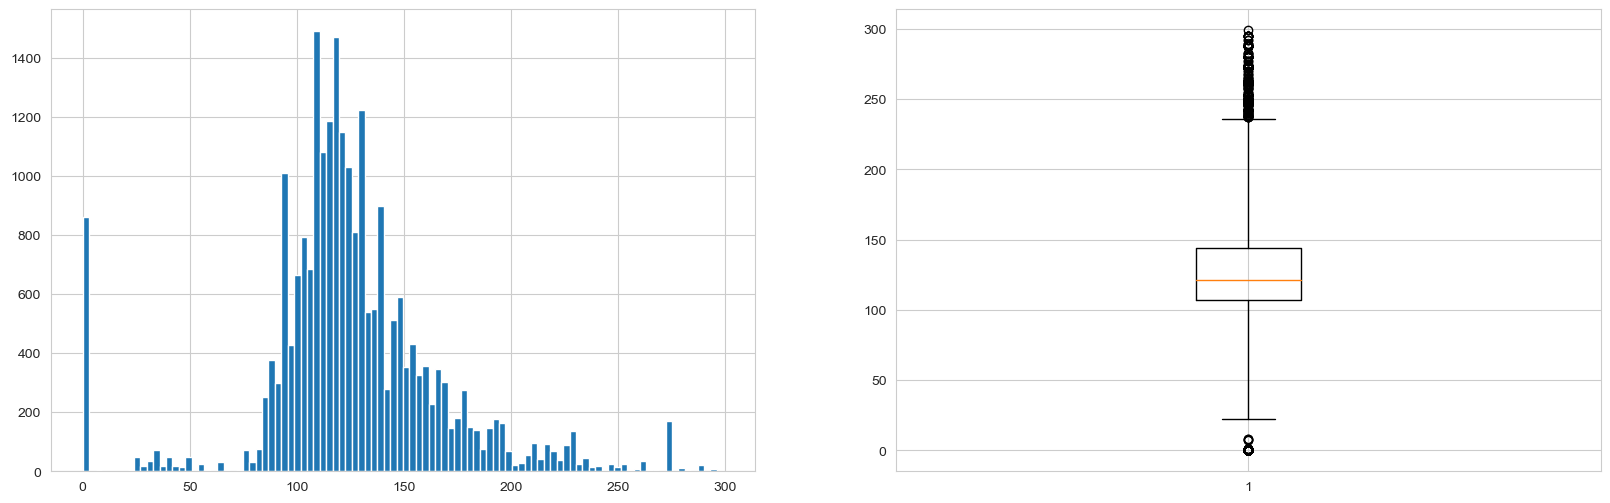

In [186]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["co_emissions"], bins=100)

plt.subplot(122)
plt.boxplot(df["co_emissions"], whis=2.5)

plt.show()

# Feature Engineering Emission Degree

In [187]:
df["emission_degree"] = df.co_emissions.transform(lambda x: "High" if x >= 180 else "Medium" if 100 <= x < 180 else "Low" if x < 150 else np.nan)

In [188]:
df.emission_degree.value_counts(dropna = False)

Medium    17468
Low        4238
High       2028
Name: emission_degree, dtype: int64

<a id="11"></a>
<div class="alert alert-info" role="alert">
<h1>Previous Owner<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

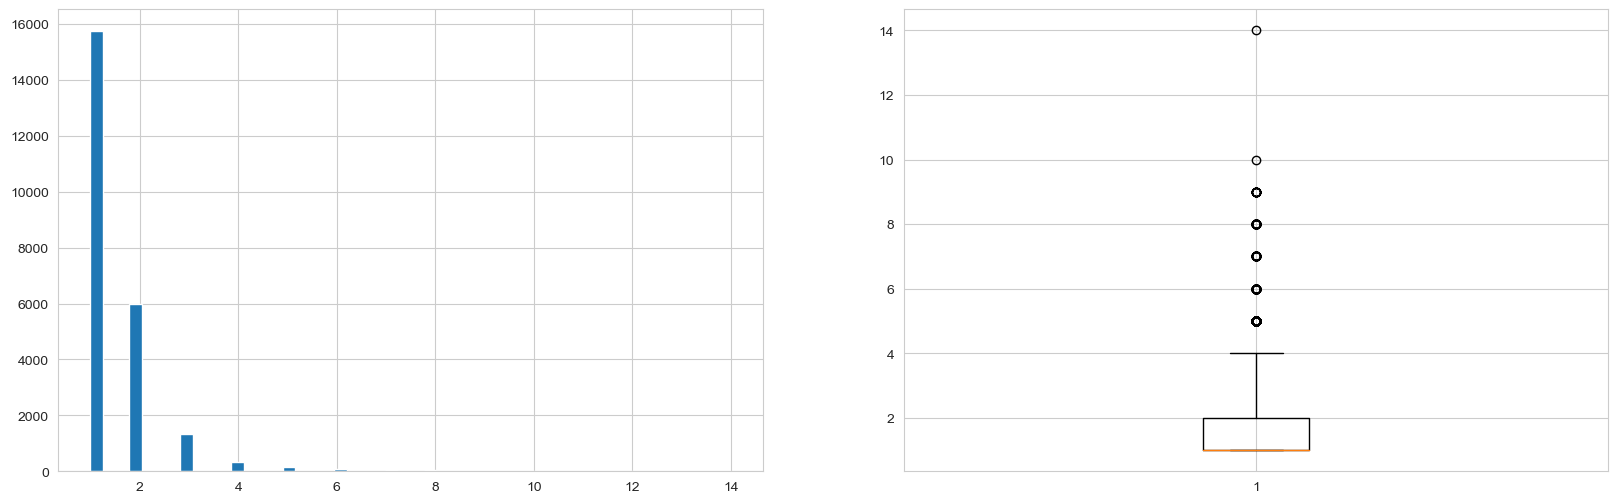

In [189]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["previous_owner"], bins=50)

plt.subplot(122)
plt.boxplot(df["previous_owner"], whis=2.5)

plt.show()

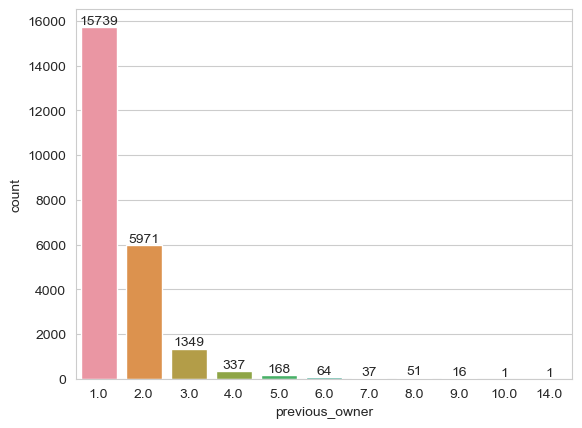

In [190]:
ax = sns.countplot(data = df, x = "previous_owner")
for i in ax.containers:
    plt.bar_label(i);

In [191]:
df.sort_values(by=["previous_owner"], ascending=False)["previous_owner"].head(20)

7400    14.00
7105    10.00
26265    9.00
7459     9.00
7417     9.00
6393     9.00
25351    9.00
6410     9.00
26093    9.00
26151    9.00
26154    9.00
26216    9.00
26252    9.00
3045     9.00
7323     9.00
7195     9.00
9649     9.00
25667    9.00
25232    8.00
25204    8.00
Name: previous_owner, dtype: float64

In [192]:
df.sort_values(by=["previous_owner"], ascending=True)["previous_owner"]

14217    1.00
13801    1.00
13802    1.00
13803    1.00
13804    1.00
13806    1.00
13807    1.00
13808    1.00
13809    1.00
13810    1.00
13811    1.00
13812    1.00
13813    1.00
13814    1.00
13800    1.00
13815    1.00
13817    1.00
13818    1.00
13819    1.00
13821    1.00
22852    1.00
13823    1.00
13824    1.00
13825    1.00
13826    1.00
13827    1.00
13828    1.00
13829    1.00
13830    1.00
13816    1.00
13799    1.00
13798    1.00
13797    1.00
13762    1.00
22872    1.00
22871    1.00
22870    1.00
22869    1.00
22868    1.00
22867    1.00
13769    1.00
13770    1.00
13771    1.00
13772    1.00
22866    1.00
22862    1.00
13776    1.00
13777    1.00
13778    1.00
13779    1.00
22860    1.00
22859    1.00
13783    1.00
13787    1.00
22856    1.00
13790    1.00
22855    1.00
13792    1.00
13793    1.00
13794    1.00
13795    1.00
13796    1.00
22851    1.00
22873    1.00
13832    1.00
13834    1.00
13868    1.00
22845    1.00
13870    1.00
22844    1.00
13872    1.00
13873 

In [193]:
df.loc[df.sort_values(by=["previous_owner"], ascending=False)["previous_owner"].head(20).index][["make_model", "body_type", "fuel_type", "mile_class", "age", "previous_owner"]]

make_model      body_type fuel_type mile_class   age  \
7400            Peugeot 207    Convertible   Benzine  100k-200k 15.00   
7105            Peugeot 206        Compact   Benzine  100k-200k 18.00   
26265             Volvo C70          Coupe   Benzine  100k-200k 20.00   
7459            Peugeot 206    Convertible   Benzine  100k-200k 19.00   
7417            Peugeot 206    Convertible   Benzine  100k-200k 19.00   
6393           Renault Clio  Station wagon    Diesel  100k-200k  7.00   
25351             Volvo C70    Convertible   Benzine   50k-100k 20.00   
6410   Renault Grand Scenic  Station wagon    Diesel  100k-200k  7.00   
26093             Volvo C70          Coupe   Benzine  100k-200k 20.00   
26151             Volvo C70          Coupe   Benzine  100k-200k 20.00   
26154             Volvo C70          Coupe   Benzine  200k-300k 20.00   
26216             Volvo C70          Coupe   Benzine  300k-500k 20.00   
26252             Volvo C70          Coupe   Benzine  200k-300k 20.00   
3045             Opel Astra    Convertible   Benzine  200k-300k 20.00   
7323            Peugeot 307        Compact   Benzine  100k-200k 19.00   
7195            Peugeot 307        Compact   Benzine  100k-200k 19.00   
9649               Fiat 500        Compact   Benzine   50k-100k  6.00   
25667             Volvo C70    Convertible   Benzine   50k-100k 20.00   
25232             Volvo V40        Compact    Diesel  100k-200k  8.00   
25204             Volvo V40        Compact    Diesel  100k-200k  8.00   

       previous_owner  
7400            14.00  
7105            10.00  
26265            9.00  
7459             9.00  
7417             9.00  
6393             9.00  
25351            9.00  
6410             9.00  
26093            9.00  
26151            9.00  
26154            9.00  
26216            9.00  
26252            9.00  
3045             9.00  
7323             9.00  
7195             9.00  
9649             9.00  
25667            9.00  
25232            8.00  
25204            8.00

In [194]:
df.drop(df[df["previous_owner"] >= 9].index, inplace = True) 

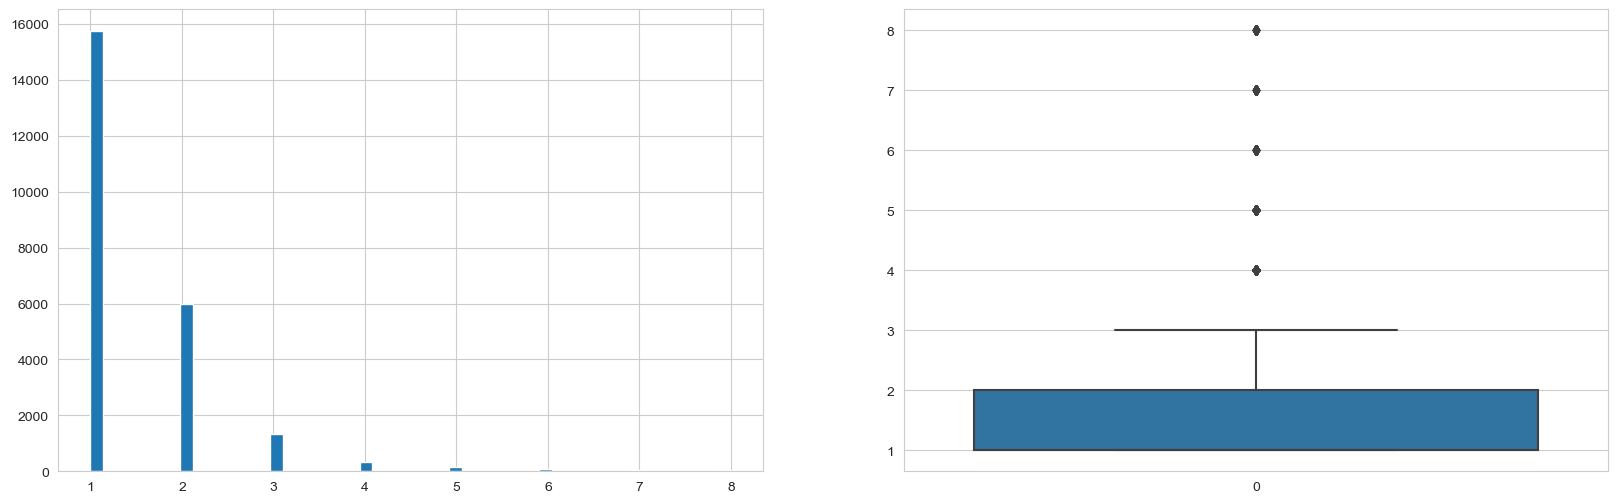

In [195]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df["previous_owner"], bins=50)

plt.subplot(122)
sns.boxplot(df["previous_owner"], whis=1.5)

plt.show()

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23716 entries, 0 to 28203
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             23716 non-null  object 
 1   make                   23716 non-null  object 
 2   price                  23716 non-null  float64
 3   body_type              23716 non-null  object 
 4   type                   23716 non-null  object 
 5   doors                  23716 non-null  float64
 6   warranty               23716 non-null  object 
 7   mileage                23716 non-null  float64
 8   gearbox                23716 non-null  object 
 9   fuel_type              23716 non-null  object 
 10  paint                  23716 non-null  object 
 11  seller                 23716 non-null  object 
 12  seats                  23716 non-null  float64
 13  power_kwh              23716 non-null  float64
 14  engine_size            23716 non-null  float64
 15  ge

<a id="13"></a>
<div class="alert alert-info" role="alert">
<h1>Dublicate Check<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

### Dublicates have been removed from the DataFrame

In [198]:
df.duplicated(keep=False).sum()

5559

In [199]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(23716, 32)
(20134, 32)


In [200]:
df.shape

(20134, 32)

<a id="14"></a>
<div class="alert alert-info" role="alert">
<h1>Dummy Operation<span style="color:red">  </span></h1>
</div>

<a href="#toc" class="btn btn-warning btn-lg active" role="button" aria-pressed="true" style="color:black;">Content</a>

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20134 entries, 0 to 28203
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             20134 non-null  object 
 1   make                   20134 non-null  object 
 2   price                  20134 non-null  float64
 3   body_type              20134 non-null  object 
 4   type                   20134 non-null  object 
 5   doors                  20134 non-null  float64
 6   warranty               20134 non-null  object 
 7   mileage                20134 non-null  float64
 8   gearbox                20134 non-null  object 
 9   fuel_type              20134 non-null  object 
 10  paint                  20134 non-null  object 
 11  seller                 20134 non-null  object 
 12  seats                  20134 non-null  float64
 13  power_kwh              20134 non-null  float64
 14  engine_size            20134 non-null  float64
 15  ge

In [202]:
df.reset_index(drop=True, inplace=True)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20134 entries, 0 to 20133
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   make_model             20134 non-null  object 
 1   make                   20134 non-null  object 
 2   price                  20134 non-null  float64
 3   body_type              20134 non-null  object 
 4   type                   20134 non-null  object 
 5   doors                  20134 non-null  float64
 6   warranty               20134 non-null  object 
 7   mileage                20134 non-null  float64
 8   gearbox                20134 non-null  object 
 9   fuel_type              20134 non-null  object 
 10  paint                  20134 non-null  object 
 11  seller                 20134 non-null  object 
 12  seats                  20134 non-null  float64
 13  power_kwh              20134 non-null  float64
 14  engine_size            20134 non-null  float64
 15  ge

In [204]:
# Data set has been saved before encoding process

df.to_csv("auto_scout_not_dummy.csv", index=False)
df = pd.read_csv("auto_scout_not_dummy.csv")

In [205]:
df.drop(["mile_class","engine_class","seats", "doors"], axis = 1, inplace = True)

In [206]:
df.select_dtypes(include="number").corr()

price  mileage  power_kwh  engine_size  gears  co_emissions  \
price              1.00    -0.58       0.54         0.23   0.34         -0.06   
mileage           -0.58     1.00       0.01         0.33  -0.06          0.27   
power_kwh          0.54     0.01       1.00         0.70   0.34          0.39   
engine_size        0.23     0.33       0.70         1.00   0.16          0.48   
gears              0.34    -0.06       0.34         0.16   1.00          0.13   
co_emissions      -0.06     0.27       0.39         0.48   0.13          1.00   
fuel_consumption  -0.05     0.29       0.48         0.56   0.16          0.73   
empty_weight       0.51     0.09       0.64         0.68   0.38          0.30   
previous_owner    -0.32     0.38       0.01         0.15  -0.07          0.18   
age               -0.64     0.74       0.04         0.36  -0.14          0.43   

                  fuel_consumption  empty_weight  previous_owner   age  
price                        -0.05          0.51           -0.32 -0.64  
mileage                       0.29          0.09            0.38  0.74  
power_kwh                     0.48          0.64            0.01  0.04  
engine_size                   0.56          0.68            0.15  0.36  
gears                         0.16          0.38           -0.07 -0.14  
co_emissions                  0.73          0.30            0.18  0.43  
fuel_consumption              1.00          0.36            0.21  0.48  
empty_weight                  0.36          1.00           -0.04 -0.00  
previous_owner                0.21         -0.04            1.00  0.47  
age                           0.48         -0.00            0.47  1.00

In [207]:
df.shape

(20134, 28)

In [208]:
df[['make_model', 'location_country']] = df[['make_model', 'location_country']].apply(lambda x: pd.factorize(x)[0])

In [210]:
dummy_columns = df.select_dtypes(include="object").columns

In [211]:
df_2 = df.copy()

In [212]:
for column in dummy_columns:
    dummies = pd.get_dummies(df_2[column])
    df_2[dummies.columns] = dummies
df_2.drop(dummy_columns, axis=1, inplace=True)
    
df_2.T

0         1         2        3        4        5      \
make_model            0.00      1.00      2.00     3.00     4.00     0.00   
price             16950.00  16800.00   4690.00 26900.00 23900.00 14200.00   
mileage          120200.00 197000.00 165000.00 48900.00 21854.00 99016.00   
power_kwh            99.33    136.00    122.00   190.00   139.00    90.00   
engine_size           1.50      2.10      1.80     2.00     2.00     1.50   
gears                 7.00      7.00      6.00     7.00     1.00     5.00   
co_emissions         98.00    109.00    196.00   141.00   106.00    98.00   
fuel_consumption     41.97     53.70     78.80    58.60    59.20    41.60   
empty_weight       1291.00   1545.00   1465.00  1450.00  1365.00  1295.00   
previous_owner        2.00      2.00      2.00     2.00     3.00     2.00   
location_country      0.00      0.00      1.00     0.00     0.00     2.00   
age                   6.00      7.00     17.00     3.00     4.00     7.00   
Dacia                 0.00      0.00      0.00     0.00     0.00     0.00   
Fiat                  0.00      0.00      0.00     0.00     0.00     0.00   
Ford                  0.00      0.00      0.00     0.00     0.00     0.00   
Hyundai               0.00      0.00      0.00     0.00     0.00     0.00   
Mercedes-Benz         1.00      1.00      1.00     1.00     1.00     1.00   
Nissan                0.00      0.00      0.00     0.00     0.00     0.00   
Opel                  0.00      0.00      0.00     0.00     0.00     0.00   
Peugeot               0.00      0.00      0.00     0.00     0.00     0.00   
Renault               0.00      0.00      0.00     0.00     0.00     0.00   
SEAT                  0.00      0.00      0.00     0.00     0.00     0.00   
Skoda                 0.00      0.00      0.00     0.00     0.00     0.00   
Toyota                0.00      0.00      0.00     0.00     0.00     0.00   
Volvo                 0.00      0.00      0.00     0.00     0.00     0.00   
Compact               1.00      1.00      1.00     1.00     1.00     1.00   
Convertible           0.00      0.00      0.00     0.00     0.00     0.00   
Coupe                 0.00      0.00      0.00     0.00     0.00     0.00   
Off-Road/Pick-up      0.00      0.00      0.00     0.00     0.00     0.00   
Sedan                 0.00      0.00      0.00     0.00     0.00     0.00   
Station wagon         0.00      0.00      0.00     0.00     0.00     0.00   
Demonstration         0.00      0.00      0.00     0.00     0.00     0.00   
Employee's car        0.00      0.00      0.00     0.00     0.00     0.00   
Pre-registered        0.00      0.00      0.00     0.00     0.00     0.00   
Used                  1.00      1.00      1.00     1.00     1.00     1.00   
No                    0.00      0.00      0.00     0.00     0.00     0.00   
Yes                   1.00      1.00      1.00     1.00     1.00     1.00   
Automatic             0.00      1.00      0.00     1.00     1.00     0.00   
Manual                1.00      0.00      1.00     0.00     0.00     1.00   
Semi-automatic        0.00      0.00      0.00     0.00     0.00     0.00   
Benzine               0.00      0.00      1.00     1.00     0.00     0.00   
Diesel                1.00      1.00      0.00     0.00     1.00     1.00   
Electric              0.00      0.00      0.00     0.00     0.00     0.00   
Hybrid                0.00      0.00      0.00     0.00     0.00     0.00   
Hybrid/Diesel         0.00      0.00      0.00     0.00     0.00     0.00   
LPG                   0.00      0.00      0.00     0.00     0.00     0.00   
Matte                 0.00      0.00      0.00     0.00     0.00     0.00   
Metallic              1.00      1.00      1.00     1.00     0.00     1.00   
Pearlescent           0.00      0.00      0.00     0.00     0.00     0.00   
Uni/basic             0.00      0.00      0.00     0.00     1.00     0.00   
Dealer                1.00      1.00      1.00     1.00     1.00     1.00   
Private seller   

In [213]:
df_2.to_csv("Auto_Scout_Final_dummy.csv")

In [214]:
df[dummy_columns] = df[dummy_columns].apply(lambda x: pd.factorize(x)[0])
df.T

0         1         2        3        4      \
make_model                 0.00      1.00      2.00     3.00     4.00   
make                       0.00      0.00      0.00     0.00     0.00   
price                  16950.00  16800.00   4690.00 26900.00 23900.00   
body_type                  0.00      0.00      0.00     0.00     0.00   
type                       0.00      0.00      0.00     0.00     0.00   
warranty                   0.00      0.00      1.00     0.00     0.00   
mileage               120200.00 197000.00 165000.00 48900.00 21854.00   
gearbox                    0.00      1.00      0.00     1.00     1.00   
fuel_type                  0.00      0.00      1.00     1.00     0.00   
paint                      0.00      0.00      0.00     0.00     1.00   
seller                     0.00      0.00      0.00     0.00     0.00   
power_kwh                 99.33    136.00    122.00   190.00   139.00   
engine_size                1.50      2.10      1.80     2.00     2.00   
gears                      7.00      7.00      6.00     7.00     1.00   
co_emissions              98.00    109.00    196.00   141.00   106.00   
drivetrain                 0.00      1.00      2.00     0.00     0.00   
fuel_consumption          41.97     53.70     78.80    58.60    59.20   
comfort_&_convenience      0.00      0.00      0.00     1.00     1.00   
entertainment_&_media      0.00      0.00      0.00     0.00     0.00   
safety_&_security          0.00      0.00      1.00     0.00     0.00   
extras                     0.00      0.00      1.00     0.00     0.00   
empty_weight            1291.00   1545.00   1465.00  1450.00  1365.00   
full_service_history       0.00      0.00      0.00     0.00     0.00   
upholstery                 0.00      0.00      1.00     0.00     0.00   
previous_owner             2.00      2.00      2.00     2.00     3.00   
location_country           0.00      0.00      1.00     0.00     0.00   
age                        6.00      7.00     17.00     3.00     4.00   
emission_degree            0.00      1.00      2.00     1.00     1.00   

                         5        6        7        8         9      ...  \
make_model                0.00     1.00     5.00     6.00      1.00  ...   
make                      0.00     0.00     0.00     0.00      0.00  ...   
price                 14200.00 37999.00 23999.00 24400.00  16999.00  ...   
body_type                 0.00     0.00     0.00     0.00      0.00  ...   
type                      0.00     0.00     0.00     0.00      0.00  ...   
warranty                  0.00     0.00     0.00     0.00      0.00  ...   
mileage               99016.00 90000.00 25914.00 27150.00 210000.00  ...   
gearbox                   0.00     1.00     1.00     0.00      1.00  ...   
fuel_type                 0.00     1.00     1.00     0.00      0.00  ...   
paint                     0.00     0.00     1.00     0.00      1.00  ...   
seller                    0.00     0.00     0.00     0.00      0.00  ...   
power_kwh                90.00   136.00   211.00   116.00    136.00  ...   
engine_size               1.50     2.00     2.00     1.50      2.10  ...   
gears                     5.00     7.00     7.00     6.00      7.00  ...   
co_emissions             98.00   162.00   140.00   120.00    109.00  ...   
drivetrain                0.00     1.00     0.00     0.00      1.00  ...   
fuel_consumption         41.60    66.30    57.70    49.30     53.70  ...   
comfort_&_convenience     0.00     1.00     0.00     0.00      0.00  ...   
entertainment_&_media     0.00     0.00     0.00     0.00      0.00  ...   
safety_&_security         0.00     0.00     0.00     1.00      0.00  ...   
extras                    0.00     0.00     0.00     2.00      0.00  ...   
empty_weight           1295.00  1555.00  1445.00  1330.00   1545.00  ...   
full_service_history      0.00     0.00     0.00     0.00      0.00  ...   
upholstery                1.00     0.00     0.00     0.00      0.00  ...   
previous

In [215]:
df.to_csv("Auto_Scout_Final_factorize.csv")